#  Student Habits vs Academic Performance

---

**Projektarbeit im Rahmen des Kurses "Erklärbare KI und Visualisierungen"**
**Name:** Mia Mainka
**Matrikelnummer:** 3047072

---

## Technische Rahmenbedingungen

Dieses Projekt wurde unter folgenden technischen Voraussetzungen erstellt:

- **Betriebssystem:** Windows 11 (64-Bit)
- **Python-Version:** 3.12.9
- **Entwicklungsumgebung (IDE):** JetBrains PyCharm

Vor der Ausführung dieses Notebooks müssen alle benötigten Bibliotheken installiert werden.
Verwenden Sie dazu die bereitgestellte Datei `requirements.txt`, innerhalb einer virtuellen Umgebung. Außerdem muss der anschließende codeblock zum import aller Bibliotheken ausgeführt werden.

```bash
pip install -r requirements.txt




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency, f_oneway
import itertools
import re



#  Inhaltsverzeichnis

## Allgemeine Struktur

- [Student Habits vs Academic Performance](#student-habits-vs-academic-performance)
  - [Technische Rahmenbedingungen](#technische-rahmenbedingungen)
  - [Inhaltsverzeichnis](#inhaltsverzeichnis-temporär)
  - [Einleitung](#einleitung)
    - [Übersicht der enthaltenen Merkmale](#übersicht-der-enthaltenen-merkmale)
    - [Synthetische Datengrundlage und methodische Einordnung](#synthetische-datengrundlage-und-methodische-einordnung)
    - [Limitationen für die Auswertung im Projektkontext](#limitationen-für-die-auswertung-im-projektkontext)
    - [Kontaktaufnahme zur Verifikation](#kontaktaufnahme-zur-verifikation)
    - [Zielsetzung und Forschungsfokus](#zielsetzung-und-forschungsfokus)

## Explorative Datenanalyse

- [Überblick über die Merkmalsverteilungen und explorative Datenanalyse](#überblick-über-die-merkmalsverteilungen-und-explorative-datenanalyse)
  - [Verteilung der numerischen Merkmale](#verteilung-der-numerischen-merkmale)
    - [Beschreibung und Interpretation der Verteilungen numerischer Merkmale](#beschreibung-und-interpretation-der-verteilungen-numerischer-merkmale)
    - [Beobachtungen und Interpretationen:](#beobachtungen-und-interpretationen)
    - [Darstellung als Korrelationsmatrix](#darstellung-als-korrelationsmatrix)
  - [Interpretation der Korrelationsmatrix](#interpretation-der-korrelationsmatrix)
    - [Vorgehen und Ziel](#vorgehen-und-ziel)
    - [Was ist auffällig?](#was-ist-auffällig)
    - [Was lässt sich daraus schließen?](#was-lässt-sich-daraus-schließen)
    - [Bewertung der Aussagekraft](#bewertung-der-aussagekraft)
  - [Verteilung kategorialer Daten](#verteilung-kategorialer-daten)
  - [Analyse der kategorialen Merkmale](#analyse-der-kategorialen-merkmale)
    - [Geschlecht (`gender`)](#geschlecht-gender)
    - [Nebenjob (`part_time_job`)](#nebenjob-part_time_job)
    - [Ernährung (`diet_quality`)](#ernährung-diet_quality)
    - [Bildungsstand der Eltern (`parental_education_level`)](#bildungsstand-der-eltern-parental_education_level)
    - [Internetqualität (`internet_quality`)](#internetqualität-internet_quality)
    - [Außercurriculare Aktivitäten (`extracurricular_participation`)](#außercurriculare-aktivitäten-extracurricular_participation)
    - [Fazit zur Verteilung](#fazit-zur-verteilung)
    - [Kreuzverteilungen zwischen kategorialen Merkmalen](#kreuzverteilungen-zwischen-kategorialen-merkmalen)
  - [Korrelation zwischen kategorialen Merkmalen](#korrelation-zwischen-kategorialen-merkmalen)
    - [Interpretation der Ergebnisse:](#interpretation-der-ergebnisse)
    - [Einordnung für die weitere Analyse:](#einordnung-für-die-weitere-analyse)
  - [Zusammenhang zwischen kategorialen und numerischen Merkmalen](#zusammenhang-zwischen-kategorialen-und-numerischen-merkmalen)
    - [Interpretation der Varianzaufklärung: Kategoriale vs. numerische Merkmale](#interpretation-der-varianzaufklärung-kategoriale-vs-numerische-merkmale)
  - [Fazit der explorativen Datenanalyse](#fazit-der-explorativen-datenanalyse)

## Modellierung und Evaluation

- [Modelltraining: Auswahl, Erklärung und Evaluation](#modelltraining-auswahl-erklärung-und-evaluation)
  - [Einleitung](#einleitung-1)
  - [Zielsetzung](#zielsetzung)
  - [Begründung für die Modellauswahl](#begründung-für-die-modellauswahl)
  - [Funktionsweise der linearen Regression](#funktionsweise-der-linearen-regression)
  - [Nächste Schritte lineare Regression](#nächste-schritte-lineare-regression)
  - [Bewertung des linearen Regressionsmodells](#bewertung-des-linearen-regressionsmodells)
    - [Modellgüte](#modellgüte)
    - [Interpretation und Limitationen](#interpretation-und-limitationen)
  - [Vergleichsmodell: Random Forest Regressor](#vergleichsmodell-random-forest-regressor)
  - [Auswertung des Random-Forest-Modells](#auswertung-des-random-forest-modells)
  - [Vergleich der Modelle: Lineare Regression vs. Random Forest](#vergleich-der-modelle-lineare-regression-vs-random-forest)
    - [Modellgüte und Vorhersagekraft im Vergleich](#modellgüte-und-vorhersagekraft-im-vergleich)
    - [Erklärbarkeit und didaktische Eignung](#erklärbarkeit-und-didaktische-eignung)
    - [Methodische Entscheidung](#methodische-entscheidung)

## XAI-Analyse mit SHAP

- [Einleitung in erklärbare KI (XAI / Explainable Artificial Intelligence)](#einleitung-in-erklärbare-ki-xai--explainable-artificial-intelligence)
  - [SHAP Barplot – Globale Bedeutung der Merkmale](#shap-barplot--globale-bedeutung-der-merkmale)
  - [SHAP Summary Plot – Wirkung und Streuung der Merkmalseffekte](#shap-summary-plot--wirkung-und-streuung-der-merkmalseffekte)
  - [SHAP Dependence Plot – Lernzeit in Wechselwirkung mit Schlafdauer](#shap-dependence-plot--lernzeit-in-wechselwirkung-mit-schlafdauer)
  - [SHAP Barplot – Globale Bedeutung der Merkmale (Random Forest)](#shap-barplot--globale-bedeutung-der-merkmale-random-forest)
  - [SHAP Summary Plot – Verteilung und Richtung der Merkmalseffekte (Random Forest)](#shap-summary-plot--verteilung-und-richtung-der-merkmalseffekte-random-forest)
  - [SHAP Dependence Plot – Lernzeit in Wechselwirkung mit Schlafdauer (Random Forest)](#shap-dependence-plot--lernzeit-in-wechselwirkung-mit-schlafdauer-random-forest)
  - [SHAP Dependence Plot – Mentale Gesundheit in Wechselwirkung mit Lernverhalten (Random Forest)](#shap-dependence-plot--mentale-gesundheit-in-wechselwirkung-mit-lernverhalten-random-forest)

## Modellvergleich & Schwellenwertanalyse

- [Vergleich der erklärbaren Modelle: Lineare Regression vs. Random Forest](#vergleich-der-erklärbaren-modelle-lineare-regression-vs-random-forest)
  - [Vergleich der globalen SHAP-Werte – Lineare Regression vs. Random Forest](#vergleich-der-globalen-shap-werte--lineare-regression-vs-random-forest)

- [Schwellenwertanalyse einzelner Merkmale](#schwellenwertanalyse-einzelner-merkmale)
  - [Schwellenwertanalyse: Einflussverlauf und Nullschnitt numerischer Merkmale](#schwellenwertanalyse-einflussverlauf-und-nullschnitt-numerischer-merkmale)
  - [Interpretation der Schwellenwertanalyse](#interpretation-der-schwellenwertanalyse)
    - [Was war erwartbar?](#was-war-erwartbar)
    - [Was war überraschend?](#was-war-überraschend)
    - [Bedeutung der Nullschnittpunkte](#bedeutung-der-nullschnittpunkte)

## Fazit

- [Schlussbetrachtung und Gesamteinordnung](#schlussbetrachtung-und-gesamteinordnung)
  - [Zusammenfassung des Projektverlaufs](#zusammenfassung-des-projektverlaufs)
    - [Methodische Reflexion](#methodische-reflexion)
    - [Interpretation der wichtigsten Ergebnisse](#interpretation-der-wichtigsten-ergebnisse)
    - [Limitationen](#limitationen)
    - [Bedeutung und Einsatzpotenzial](#bedeutung-und-einsatzpotenzial)
  - [Lessons Learned – Was aus dem Projekt mitgenommen wurde](#lessons-learned--was-aus-dem-projekt-mitgenommen-wurde)

- [Bonus: Interaktiver Vorhersage-Rechner](#bonus-interaktiver-vorhersage-rechner)




## Einleitung

Diese Projektarbeit beschäftigt sich mit der Frage, wie bestimmte Verhaltensgewohnheiten und Lebensumstände von Studierenden mit ihrer akademischen Leistung zusammenhängen. Grundlage der Analyse ist der Datensatz
**[Student Habits vs Academic Performance](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)**, bereitgestellt von Jayanta Naath auf Kaggle.

Der Datensatz enthält **1.000 synthetisch erzeugte Beobachtungen** mit je 16 Merkmalen, die studentische Alltagsgewohnheiten, Ressourcen und mentale Faktoren erfassen. Die Zielvariable ist die erreichte **Prüfungsnote** (`exam_score`), welche als kontinuierlicher Wert angegeben ist.

### Übersicht der enthaltenen Merkmale

- `student_id` – eindeutiger Bezeichner je Datensatz
- `age` – Alter der Studierenden
- `gender` – Geschlecht (Male/Female)
- `study_hours_per_day` – tägliche Lernzeit in Stunden
- `social_media_hours` – tägliche Nutzung sozialer Medien
- `netflix_hours` – tägliche Netflix-Nutzung
- `part_time_job` – Nebenjob (Yes/No)
- `attendance_percentage` – Anwesenheitsquote in Prozent
- `sleep_hours` – durchschnittliche Schlafdauer pro Nacht
- `diet_quality` – Qualität der Ernährung (Poor, Fair, Good)
- `exercise_frequency` – sportliche Aktivität pro Woche (in Tagen)
- `parental_education_level` – höchster Bildungsabschluss der Eltern
- `internet_quality` – subjektive Einschätzung der Internetverbindung (Poor/Average/Good)
- `mental_health_rating` – Bewertung der psychischen Gesundheit (Skala 1–10)
- `extracurricular_participation` – Teilnahme an außercurricularen Aktivitäten (Yes/No)
- `exam_score` – Prüfungsleistung (Zielgröße)

### Synthetische Datengrundlage und methodische Einordnung

Laut Angabe des Autors handelt es sich bei diesem Datensatz um vollständig **synthetisch erzeugte Daten**, die mithilfe der Python-Bibliotheken `numpy` und `pandas` generiert wurden. Die Werte beruhen auf **zufälligen Verteilungen** und wurden durch **logische Abhängigkeiten** miteinander verknüpft, um laut Beschreibung *„real-life scenarios“* zu imitieren:

> *“This dataset is synthetic, created using Python libraries (numpy, pandas) with random distributions and logical dependencies to mimic real-life scenarios.”*

Der genaue Aufbau dieser sogenannten „logical dependencies“ wird jedoch nicht näher erläutert. Es bleibt unklar, auf welchen realen Vorbildern diese Strukturen basieren – oder ob sie vollständig künstlich konstruiert wurden. Auch ist nicht ersichtlich, ob z.B. empirische Bildungsstudien oder statistische Referenzwerte für das Design herangezogen wurden. Diese Unbestimmtheit erschwert die methodische Rückverfolgbarkeit der erzeugten Muster.

### Limitationen für die Auswertung im Projektkontext

Aus der künstlichen Herkunft des Datensatzes ergeben sich mehrere Einschränkungen, die für die Interpretation der Analyseergebnisse zentral sind:

1. Die dargestellten Zusammenhänge spiegeln keine realen Daten wider, sondern resultieren aus der Auswahl der verwendeten Verteilungen und Regeln bei der Simulation.
2. Eine Übertragbarkeit auf reale Studierendenpopulationen ist methodisch nicht möglich, da keine empirische Validierung stattgefunden hat.
3. Die Analyseergebnisse können zwar interne Strukturen und Korrelationen im Datensatz aufdecken, dürfen jedoch **nicht als kausale oder evidenzbasierte Aussagen** interpretiert werden. Die gefundenen Muster gelten ausschließlich innerhalb des simulierten Rahmens.

Insbesondere der unklare Begriff „logical dependencies“ lässt offen, ob die beobachtbaren Beziehungen (z.B. zwischen Lernzeit und Prüfungsnote oder Social-Media-Konsum und mentaler Gesundheit) gezielt eingebaut wurden oder lediglich zufällig entstanden sind. Dadurch ist eine inhaltliche Bewertung der Ergebnisse nur mit großer methodischer Vorsicht möglich.

### Kontaktaufnahme zur Verifikation

Zur besseren Einschätzung des zugrundeliegenden Generierungsverfahrens wurde der Autor des Datensatzes per E-Mail kontaktiert. In der Anfrage wurde insbesondere um eine Erläuterung gebeten, wie die „realistischen Muster für Bildungspraxis“ konkret implementiert wurden. Zum Zeitpunkt der Dokumentation liegt noch keine Rückmeldung vor. Die methodische Herleitung bleibt daher vorerst unklar.

Im Rahmen dieser Projektarbeit wird der Datensatz dennoch genutzt, um Verfahren erklärbarer KI zu erproben und explorative Visualisierungen durchzuführen. Die Interpretation aller Ergebnisse erfolgt bewusst zurückhaltend und **innerhalb des Rahmens der angenommenen Datenlogik**.

### Zielsetzung und Forschungsfokus

Ziel dieses Projekts ist es zu untersuchen, welche Gewohnheiten, Verhaltensmuster und Merkmale im studentischen Alltag mit der akademischen Leistung gemessen an der Prüfungsnote (`exam_score`) zusammenhängen. Dabei stehen folgende Leitfragen im Mittelpunkt:

- Inwiefern wirken sich Variablen wie tägliche Lernzeit, Schlafdauer, Social-Media-Nutzung oder mentale Gesundheit auf die Prüfungsleistung aus?
- Welche Muster lassen sich bei Studierenden mit besonders hohen oder niedrigen Leistungen erkennen?
- Welche Merkmale zeigen sich – global betrachtet oder lokal an einzelnen Beispielen als besonders einflussreich für Modellentscheidungen?

Ziel der Analyse ist es, mithilfe maschineller Lernverfahren und Methoden der erklärbaren KI (XAI - Explainable Artificial Intelligence) relevante Zusammenhänge aufzudecken und zu visualisieren. Dabei wird besonderer Wert auf Transparenz und Nachvollziehbarkeit gelegt.

Das methodische Vorgehen orientiert sich an den Inhalten der begleitenden Vorlesung „Erklärbare KI und Visualisierungen“. Dabei kommen u.a. folgende Ansätze zum Einsatz:

- **Explorative Datenanalyse (EDA)** zur Aufdeckung grundlegender Strukturen, Verteilungen und Korrelationen im Datensatz.
- **Modellierung mit Regressionsverfahren** und ggf. komplexeren Algorithmen, um Zusammenhänge zwischen den Merkmalen und der Zielgröße zu quantifizieren.
- **Erklärbarkeit durch XAI-Methoden**, insbesondere:
  - **LIME (Local Interpretable Model-Agnostic Explanations)** zur lokalen Erklärung einzelner Vorhersagen,
  - **SHAP (SHapley Additive ExPlanations)** zur Bestimmung globaler Merkmalseinflüsse und Wechselwirkungen.
- **Visuelle Aufbereitung der Ergebnisse**, um auch nicht-technischen Zielgruppen nachvollziehbare Einsichten zu ermöglichen.

Die Analyseergebnisse werden stets im Kontext der synthetischen Natur des Datensatzes reflektiert und methodisch vorsichtig interpretiert.




---

# Überblick über die Merkmalsverteilungen und explorative Datenanalyse

Bevor mit der Modellierung oder erklärenden Verfahren wie LIME oder SHAP begonnen werden kann, ist es wichtig zu verstehen, wie die einzelnen Merkmale im Datensatz verteilt sind. Die explorative Analyse (EDA) hilft dabei, ein erstes Gefühl für die Daten zu bekommen und mögliche Besonderheiten wie Ausreißer oder Schieflagen zu erkennen.

In diesem Abschnitt werden alle Merkmale aufgeteilt in **numerische** und **kategoriale** Variablen untersucht. Ziel ist es, zu sehen:
- wie sich die Werte innerhalb eines Merkmals verteilen
- ob sich Auffälligkeiten oder Muster zeigen
- welche Variablen später für eine Modellierung besonders interessant sein könnten.

Diese erste Analyse liefert wichtige Grundlagen für alle weiteren Schritte im Projekt.




## Verteilung der numerischen Merkmale

Numerische Merkmale sind kontinuierlich messbare Größen wie zum Beispiel Alter, tägliche Lernzeit oder Prüfungsleistung. In diesem Abschnitt wird die Verteilung aller numerischen Variablen dargestellt, um erste Muster zu erkennen.

Besonders interessant ist dabei:
- ob die Verteilung symmetrisch oder schief ist,
- ob es extreme Ausprägungen gibt,
- und wie stark die Streuung innerhalb eines Merkmals ausfällt.

Diese Erkenntnisse helfen später dabei, geeignete Modelle zu wählen und die Merkmale richtig vorzubereiten – z.B. ob eine Skalierung nötig ist oder ob sich ein Merkmal als erklärungsstark für die Zielgröße `exam_score` eignet.


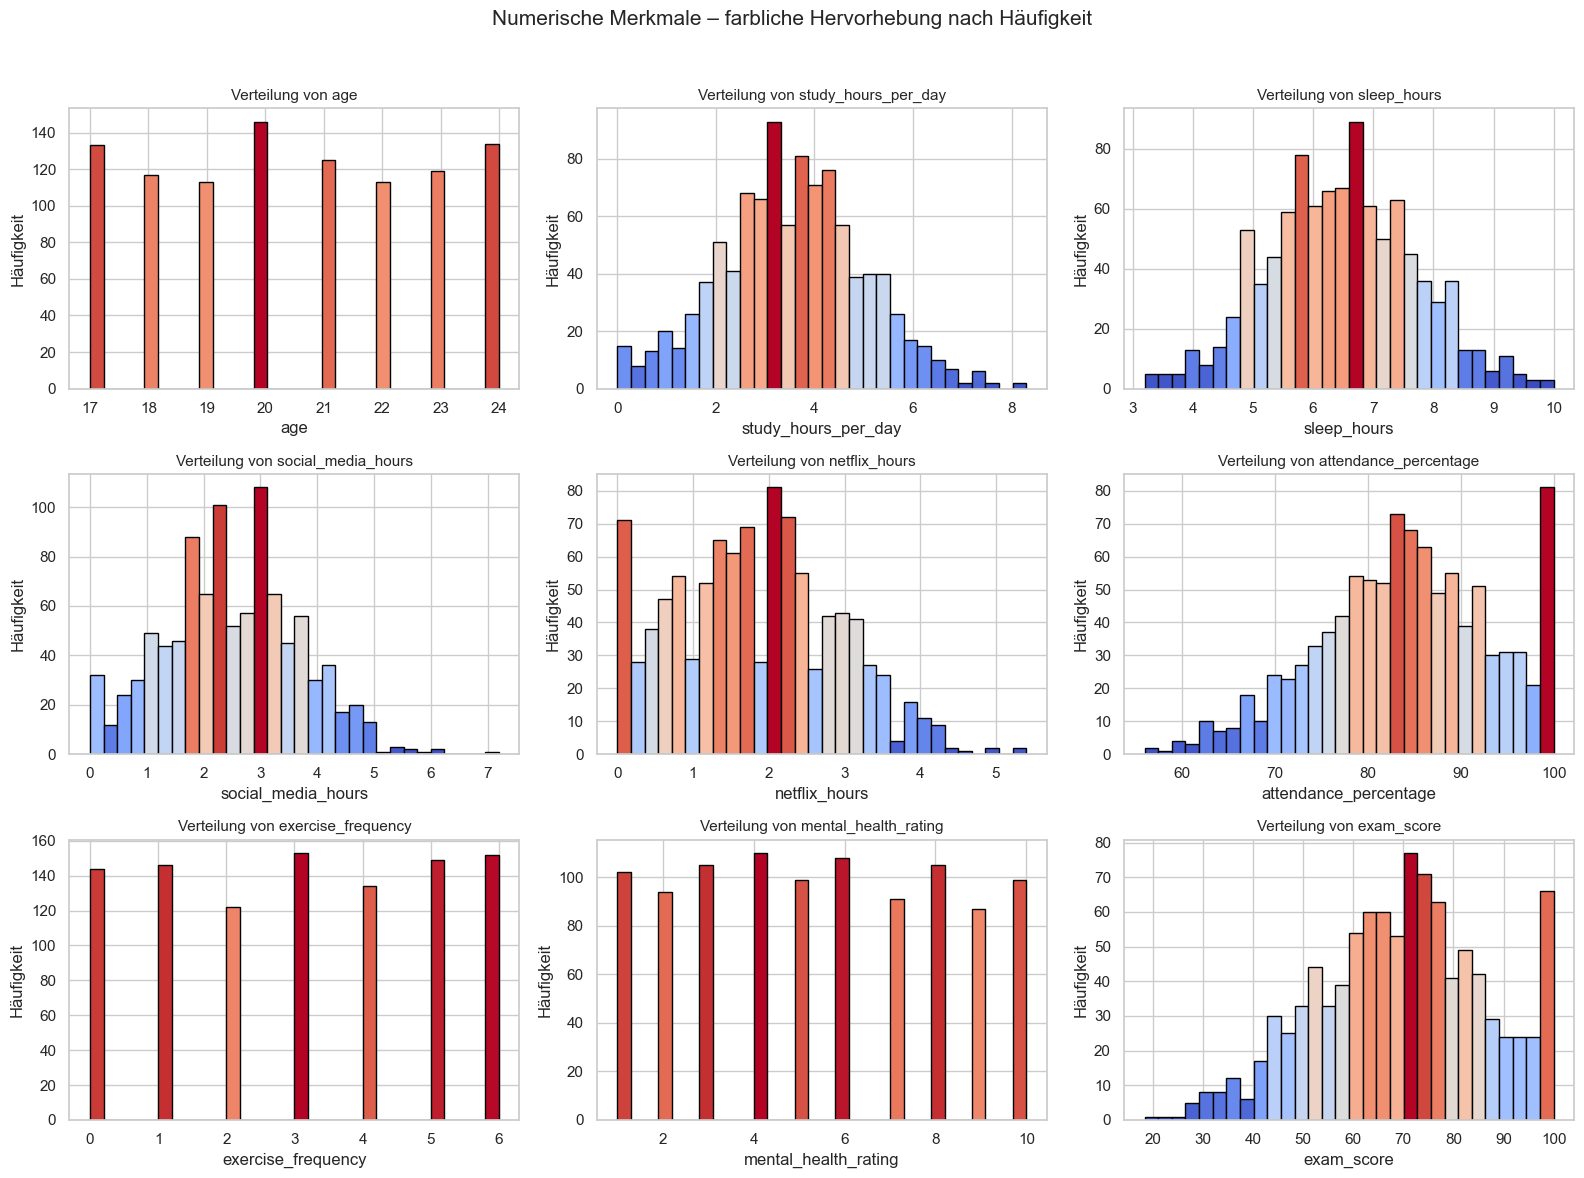

In [2]:
# Schritt 2: CSV-Datei einlesen
# Die Datei muss im Unterordner "data" liegen
df = pd.read_csv("data/student_habits_performance.csv")

# Schritt 3: Ungültige Werte bereinigen
# Altersangabe von 0 ist inhaltlich nicht plausibel und wird herausgefiltert
df_filtered = df[df["age"] > 0].copy()

# Schritt 4: Liste numerischer Merkmale definieren
# Diese Merkmale sollen als Histogramme dargestellt werden
numerical_features = [
    'age',
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'exercise_frequency',
    'mental_health_rating',
    'exam_score'
]

# Schritt 5: Plot-Stil und Layout definieren
sns.set(style="whitegrid")  # Heller Hintergrund mit Gitterlinien
plt.rcParams["figure.figsize"] = (16, 12)  # Gesamtgröße des Plots
fig, axes = plt.subplots(3, 3)  # 3x3-Raster für 9 Merkmale
axes = axes.flatten()  # Achsenarray flach machen für einfacheren Zugriff

# Schritt 6: Farbverlauf festlegen
# "coolwarm" verläuft von blau (niedrig) über weiß zu rot (hoch)
cmap = plt.get_cmap("coolwarm")

# Schritt 7: Plot für jedes Merkmal erzeugen
for i, feature in enumerate(numerical_features):
    # Histogramm berechnen: Zähle Werte pro Intervall (bin)
    counts, bins = np.histogram(df_filtered[feature], bins=30)

    # Bin-Mittelpunkte für die Platzierung der Balken berechnen
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Normierung: Häufigkeiten (counts) werden auf 0–1 skaliert für die Farbvergabe
    norm = plt.Normalize(vmin=min(counts), vmax=max(counts))

    # Farben zuweisen: Hohe Balken = warm (rot), niedrige = kühl (blau)
    colors = cmap(norm(counts))

    # Zeichne farbcodierte Balken
    axes[i].bar(
        bin_centers,  # Position auf der x-Achse (zentriert)
        counts,  # Höhe der Balken
        width=np.diff(bins),  # Breite der Balken
        align="center",  # Balken mittig über bin platzieren
        color=colors,  # Farbe abhängig von Häufigkeit
        edgecolor="black"  # Schwarze Kanten für bessere Lesbarkeit
    )

    # Titel und Achsenbeschriftung setzen
    axes[i].set_title(f"Verteilung von {feature}", fontsize=11)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Häufigkeit")

# Schritt 8: Gesamttitel und Layout anpassen
plt.suptitle("Numerische Merkmale – farbliche Hervorhebung nach Häufigkeit", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Beschreibung und Interpretation der Verteilungen numerischer Merkmale

In diesem Abschnitt wurden die wichtigsten numerischen Merkmale mithilfe von **Histogrammen** visualisiert. Ein Histogramm ist besonders geeignet, um die **Verteilung** einer kontinuierlichen Variable darzustellen, da es Häufigkeiten in bestimmten Wertebereichen (sogenannten Bins) zeigt. Die Histogramme wurden so eingefärbt, dass **häufig auftretende Werte rötlich** und **seltenere Werte bläulich** erscheinen. Das erleichtert das visuelle Erkennen von Schwerpunkten.

#### Vorgehensweise:
- Es wurden 30 Bins pro Variable definiert (also 30 Werteintervalle mit gleicher Breite).
- Nur eindeutig unplausible Werte wurden vorab bereinigt, etwa `age = 0`. Realistische Nullen, wie z.B. `netflix_hours = 0`, wurden beibehalten.
- Die Plots zeigen die Häufigkeitsverteilung aller neun numerischen Merkmale im Datensatz.

---

### Beobachtungen und Interpretationen:

- **Alter (`age`)**
  Die Werte konzentrieren sich zwischen 18 und 24 Jahren, mit einem Peak bei etwa 20. Das entspricht einer typischen Studierendenpopulation.

- **Tägliche Lernzeit (`study_hours_per_day`)**
  Die Verteilung ist leicht linksschief, mit einem deutlichen Peak zwischen 3 und 4 Stunden. Das ist plausibel für regulär Studierende.

- **Schlafdauer (`sleep_hours`)**
  Der Schwerpunkt liegt zwischen 6 und 7 Stunden – das ist unterhalb der allgemein empfohlenen 7 bis 9 Stunden. Auffällig ist, dass Schlafzeiten unter 6 Stunden relativ häufig vorkommen, was möglicherweise auf eine hohe Belastung oder ungesunde Routinen hinweist.

- **Social-Media-Nutzung (`social_media_hours`)**
  Die meisten Personen nutzen soziale Medien zwischen 2 und 4 Stunden täglich. Das liegt im erwartbaren Bereich, könnte aber je nach individueller Tagesplanung als hoch gewertet werden.

- **Netflix-Nutzung (`netflix_hours`)**
  Viele Einträge liegen bei 1–2 Stunden pro Tag. Es gibt jedoch auch eine erkennbare Anzahl mit `0` Stunden, was realistisch und im Datensatz belassen wurde.

- **Anwesenheitsquote (`attendance_percentage`)**
  Die Werte sind stark rechtsschief verteilt, mit einem Peak bei 100 %. Das könnte durch die Datensimulation bedingt sein und einen impliziten Zusammenhang mit Leistungsdaten nahelegen.

- **Sporthäufigkeit (`exercise_frequency`)**
  Fast alle Werte sind gleichmäßig über 0–6 Tage verteilt, mit leichtem Peak bei 3 Tagen. Eine klare Vorliebe für bestimmte Bewegungsmuster ist nicht erkennbar.

- **Mentale Gesundheit (`mental_health_rating`)**
  Die Werte verteilen sich relativ gleichmäßig auf die Skala von 1 bis 10, mit leichter Häufung im mittleren Bereich (5–7). Sehr niedrige Bewertungen (unter 3) kommen kaum vor.

- **Prüfungsnote (`exam_score`)**
  Die Noten sind zwischen 40 und 100 breit verteilt, mit einem Peak bei ca. 75 Punkten. Auffällig ist, dass extrem niedrige Werte fast nicht vorhanden sind – das könnte ein Indiz für eine Verzerrung in der Datenverteilung sein.

---

Diese erste Auswertung zeigt bereits wichtige Tendenzen im Datensatz, die im weiteren Projektverlauf berücksichtigt werden. Besonders die teilweise schiefen Verteilungen und die Peaks bei Extremwerten (z.B. 100 % Anwesenheit) sollten bei der Modellwahl und bei erklärenden Methoden wie LIME oder SHAP kritisch reflektiert werden.


### Darstellung als Korrelationsmatrix

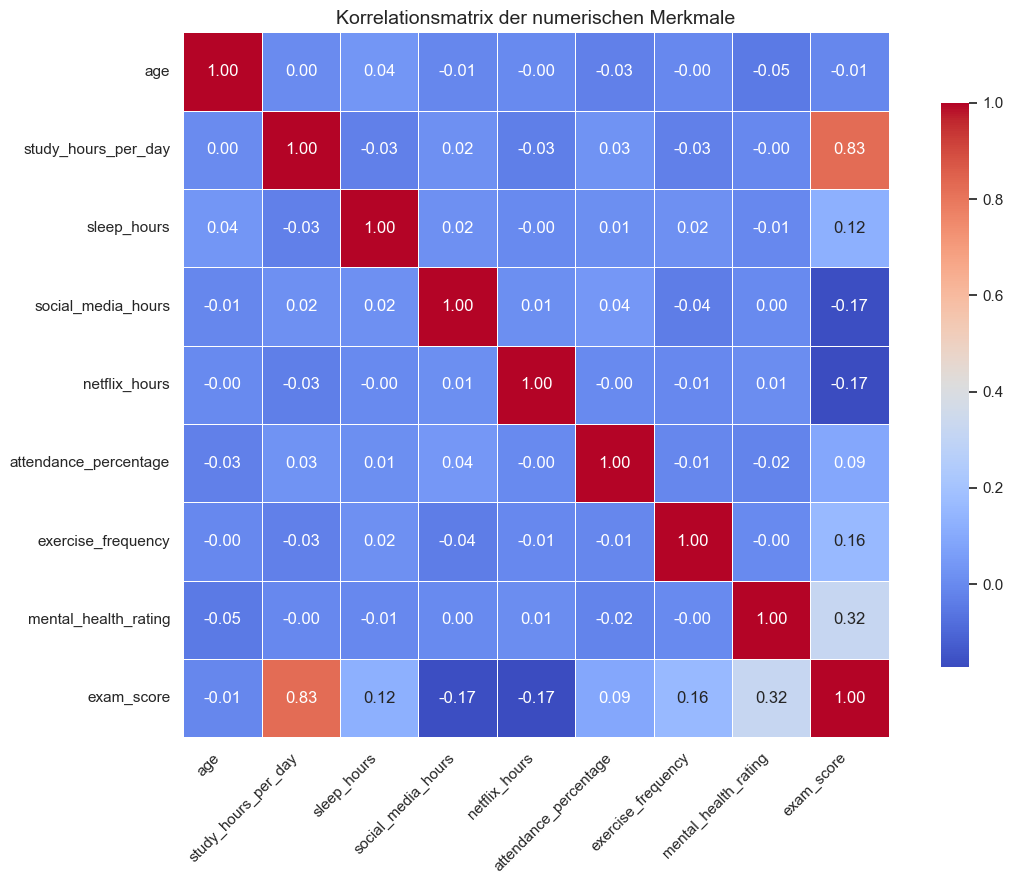

In [3]:
# Schritt 2: Daten einlesen
df = pd.read_csv("data/student_habits_performance.csv")

# Schritt 3: Unplausible Werte bereinigen (z.B. Alter = 0 ist nicht realistisch)
df = df[df["age"] > 0]

# Schritt 4: Liste der numerischen Merkmale (wie bereits in vorheriger Analyse definiert)
numerical_features = [
    'age',
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'exercise_frequency',
    'mental_health_rating',
    'exam_score'
]

# Schritt 5: Korrelationsmatrix berechnen (nur für numerische Merkmale)
correlation_matrix = df[numerical_features].corr()

# Schritt 6: Plot-Stil und Größe definieren
sns.set(style="whitegrid")
plt.figure(figsize=(12, 9))

# Schritt 7: Heatmap erzeugen
sns.heatmap(
    correlation_matrix,
    annot=True,              # Korrelationswerte als Text anzeigen
    fmt=".2f",               # Format mit 2 Nachkommastellen
    cmap="coolwarm",         # Farbskala: Blau = negativ, Rot = positiv
    square=True,             # Zellen quadratisch
    linewidths=0.5,          # Linien zwischen Feldern
    cbar_kws={"shrink": .8}  # Farblegende verkleinern
)

# Schritt 8: Achsentitel und Layout anpassen
plt.title("Korrelationsmatrix der numerischen Merkmale", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Interpretation der Korrelationsmatrix

Um ein besseres Verständnis für die Zusammenhänge zwischen den numerischen Variablen im Datensatz zu gewinnen, wurde eine **Korrelationsmatrix** erstellt und als Heatmap visualisiert. Dabei wurde der Pearson-Korrelationskoeffizient berechnet, der angibt, wie stark zwei Variablen **linear** miteinander zusammenhängen.

Die Darstellung zeigt, in welchem Ausmaß sich zwei Merkmale gemeinsam verändern, also ob hohe Werte des einen Merkmals mit hohen (positiver Zusammenhang) oder niedrigen Werten (negativer Zusammenhang) des anderen Merkmals einhergehen. Die Farbskala reicht von **blau (negativ)** bis **rot (positiv)** und verdeutlicht die Stärke dieser Zusammenhänge auf einen Blick.

---

### Vorgehen und Ziel

Die Korrelationsanalyse wurde ausschließlich auf **numerische Merkmale** angewendet, da für kategoriale Merkmale andere Methoden wie z.B. Cramér’s V oder logistische Regressionsansätze besser geeignet sind.

Ziel dieser Darstellung ist es:
- frühe Hinweise auf **relevante Einflussfaktoren** für die Prüfungsleistung (`exam_score`) zu erkennen,
- **redundante Merkmale** zu identifizieren, die stark miteinander korreliert sein könnten,
- und eine Grundlage für die spätere Auswahl und Bewertung von Modellen und Erklärbarkeits-Methoden zu schaffen.

---

### Was ist auffällig?

Beim Durchsehen der Heatmap fallen mehrere interessante Punkte auf:

- **Starke Korrelation** zwischen `study_hours_per_day` und `exam_score` (**+0.83**):
  Diese Beziehung ist sehr deutlich und deckt sich mit der allgemeinen Erwartung, dass mehr tägliche Lernzeit zu besseren Prüfungsergebnissen führt. Es ist plausibel und unterstreicht die Bedeutung dieser Variable für spätere Modelle.

- **Moderate Korrelation** zwischen `mental_health_rating` und `exam_score` (**+0.32**):
  Auch hier zeigt sich ein nachvollziehbarer Zusammenhang: Studierende mit besser eingeschätztem mentalen Wohlbefinden scheinen tendenziell bessere Noten zu erreichen. Es wäre interessant, ob dieser Zusammenhang auch bei realen Daten bestehen bleibt.

- **Schwache negative Korrelationen** zwischen `social_media_hours`, `netflix_hours` und `exam_score` (jeweils **-0.17**):
  Diese deuten darauf hin, dass übermäßiger Konsum von Medieninhalten leicht negativ mit der Prüfungsleistung zusammenhängt. Ein häufig angenommener, aber hier nur schwach messbarer Effekt.

- **`age` ist mit fast keinem anderen Merkmal korreliert** (nahe 0):
  Das liegt daran, dass die Studierenden in der Stichprobe alle sehr ähnliche Altersangaben haben (zwischen 18 und 24 Jahren). Da wenig Varianz besteht, kann auch kaum eine lineare Beziehung zu anderen Merkmalen bestehen.

---

### Was lässt sich daraus schließen?

Die Analyse zeigt, dass **nicht alle Variablen gleichermaßen informativ** für die Zielgröße `exam_score` sind. Besonders `study_hours_per_day`, aber auch `mental_health_rating`, `exercise_frequency` und `attendance_percentage` liefern erste Hinweise auf potenziell relevante Prädiktoren.

Gleichzeitig ist klar:
Eine hohe oder niedrige Korrelation sagt noch nichts über Kausalität aus. Es könnte z.B. sein, dass gute Noten die Motivation zum Lernen erhöhen (statt umgekehrt) oder dass beide Effekte durch Dritte beeinflusst werden. Um diese Fragen zu klären, sind **modellspezifische Erklärungen** durch LIME oder SHAP notwendig, die im weiteren Verlauf des Notebooks erfolgen.

---

### Bewertung der Aussagekraft

Die Korrelationsmatrix ist ein **wertvoller erster Schritt**, um grobe Zusammenhänge zu erfassen. Sie hilft dabei:
- **Hypothesen zu formulieren**, die später geprüft werden können,
- die **Modellwahl gezielter** zu gestalten (z.B. Merkmalsauswahl),
- und **Redundanz zwischen Features** zu erkennen.

Jedoch muss betont werden, dass komplexe, nichtlineare Zusammenhänge hier **nicht sichtbar** sind. Diese erfordern weiterführende Visualisierungen und modellbasierte Analysen, wie sie im nächsten Schritt des Projekts folgen werden.


---
## Verteilung kategorialer Daten

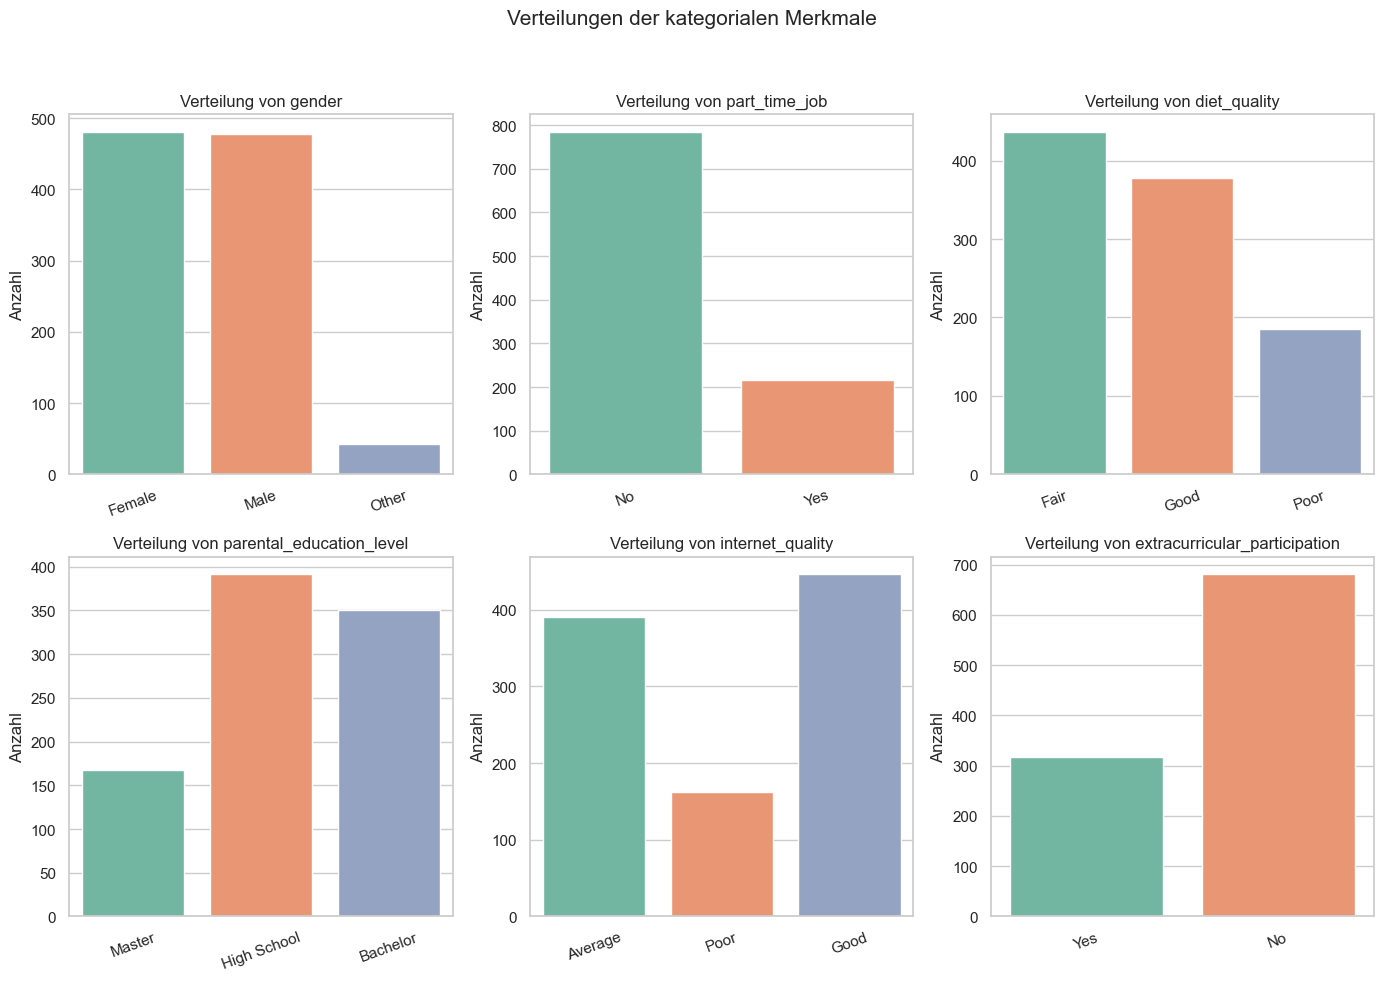

In [4]:
# Schritt 2: CSV-Datei einlesen
df = pd.read_csv("data/student_habits_performance.csv")

# Schritt 3: Plot-Stil und Darstellungsoptionen festlegen
sns.set(style="whitegrid")  # Heller Hintergrund mit Gitter
plt.rcParams["figure.figsize"] = (14, 10)  # Standardgröße der Plots

# Schritt 4: Liste aller kategorialen Merkmale definieren
categorical_features = [
    'gender',
    'part_time_job',
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation'
]

# Schritt 5: Subplots vorbereiten (2 Zeilen, 3 Spalten)
fig, axes = plt.subplots(nrows=2, ncols=3)
axes = axes.flatten()  # Achsen in flache Liste umwandeln

# Schritt 6: Iteration über alle Merkmale mit Countplots
for i, feature in enumerate(categorical_features):
    sns.countplot(
        data=df,
        x=feature,
        hue=feature,         # Farben nach Kategorie aufteilen
        legend=False,        # Legende ausschalten, da redundant zur x-Achse
        ax=axes[i],
        palette="Set2"       # Farbpalette bleibt erhalten
    )
    axes[i].set_title(f"Verteilung von {feature}", fontsize=12)
    axes[i].set_xlabel("")  # Kein Label unter der x-Achse
    axes[i].set_ylabel("Anzahl")
    axes[i].tick_params(axis='x', rotation=20)

# Schritt 7: Layout und Gesamttitel anpassen
plt.suptitle("Verteilungen der kategorialen Merkmale", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Layout für saubere Darstellung
plt.show()


## Analyse der kategorialen Merkmale

Die obige Darstellung zeigt die Häufigkeitsverteilungen aller **kategorialen Merkmale** im Datensatz. Ziel dieser Visualisierung ist es, einen Überblick darüber zu gewinnen, wie stark einzelne Kategorien vertreten sind, ob es dominante Ausprägungen gibt und ob die Verteilungen eventuell zu Verzerrungen in der Modellbildung führen könnten. Nachfolgend werden die einzelnen Merkmale interpretiert:

---

### Geschlecht (`gender`)
Die Variable `gender` ist in drei Kategorien unterteilt: *Male*, *Female* und *Other*. Die Verteilung ist nahezu ausgeglichen zwischen *Male* und *Female*, was aus statistischer Sicht vorteilhaft ist. Auffällig ist jedoch der geringe Anteil der Kategorie *Other*, was eine sinnvolle Berücksichtigung dieses Merkmals im Modell erschweren könnte.

---

### Nebenjob (`part_time_job`)
Ein Großteil der Studierenden gibt an, **keinen Nebenjob** zu haben. Lediglich ca. ein Fünftel arbeitet neben dem Studium. Diese ungleiche Verteilung könnte im Modell zu einer Verzerrung führen, insbesondere wenn sich Nebenjobs stark auf andere Merkmale wie Lernzeit oder psychische Gesundheit auswirken.

---

### Ernährung (`diet_quality`)
Die meisten Angaben fallen auf die Kategorien *Fair* und *Good*, während *Poor* seltener vorkommt. Die gleichmäßige Verteilung zwischen *Fair* und *Good* ermöglicht einen differenzierten Vergleich, allerdings ist die Kategorie *Poor* möglicherweise unterrepräsentiert.

---

### Bildungsstand der Eltern (`parental_education_level`)
Hier fällt auf, dass *High School* als höchster Bildungsstand dominiert, gefolgt von *Bachelor*. *Master*-Abschlüsse sind vergleichsweise selten vertreten. Da der elterliche Bildungshintergrund als sozioökonomischer Einflussfaktor relevant sein kann, ist diese Verteilung für spätere Interpretationen wichtig.

---

### Internetqualität (`internet_quality`)
Die meisten Studierenden berichten von einer *guten* oder *durchschnittlichen* Internetqualität. Die Kategorie *Poor* ist deutlich schwächer vertreten. Diese Unausgeglichenheit könnte darauf hinweisen, dass schlechter Internetzugang seltener ein Problem ist, was wiederum Einfluss auf Online-Lernzeiten oder Mediennutzung haben kann.

---

### Außercurriculare Aktivitäten (`extracurricular_participation`)
Der Großteil der Studierenden nimmt **nicht** an außercurricularen Aktivitäten teil. Dies könnte auf einen eingeschränkten Zeitrahmen, fehlende Angebote oder geringes Interesse hindeuten. Auch hier ist die Verteilung sehr einseitig, was bei späteren Analysen mit Vorsicht zu behandeln ist.

---

### Fazit zur Verteilung
Die meisten kategorialen Merkmale zeigen **ungleiche Verteilungen**, was in der Modellierung berücksichtigt werden muss – z.B. durch gewichtete Klassen oder geeignete Kodierungsverfahren. Merkmale mit stark unterrepräsentierten Kategorien sollten besonders sorgfältig behandelt werden, da sie das Modell verzerren oder zu Overfitting führen können.

Die Balkendiagramme sind bewusst gewählt worden, um Häufigkeiten klar und vergleichbar darzustellen. Sie eignen sich besonders für kategoriale Variablen, da sie visuell deutlich machen, wie stark die einzelnen Ausprägungen vertreten sind. Zusammen mit den numerischen Verteilungen ergibt sich ein vollständiges Bild der Datenstruktur.


### Kreuzverteilungen zwischen kategorialen Merkmalen
In diesem Abschnitt analysieren wir, wie die kategorialen Merkmale des Datensatzes miteinander zusammenhängen. Da klassische Korrelationsmaße wie der Pearson-Koeffizient für kategoriale Daten nicht geeignet sind, nutzen wir stattdessen Kreuztabellen. Diese zeigen, wie häufig Merkmalsausprägungen gemeinsam auftreten.

Zur besseren Lesbarkeit werden die Werte zeilenweise normalisiert und als Heatmap dargestellt. So lassen sich Muster im Antwortverhalten und potenzielle Abhängigkeiten gut erkennen.

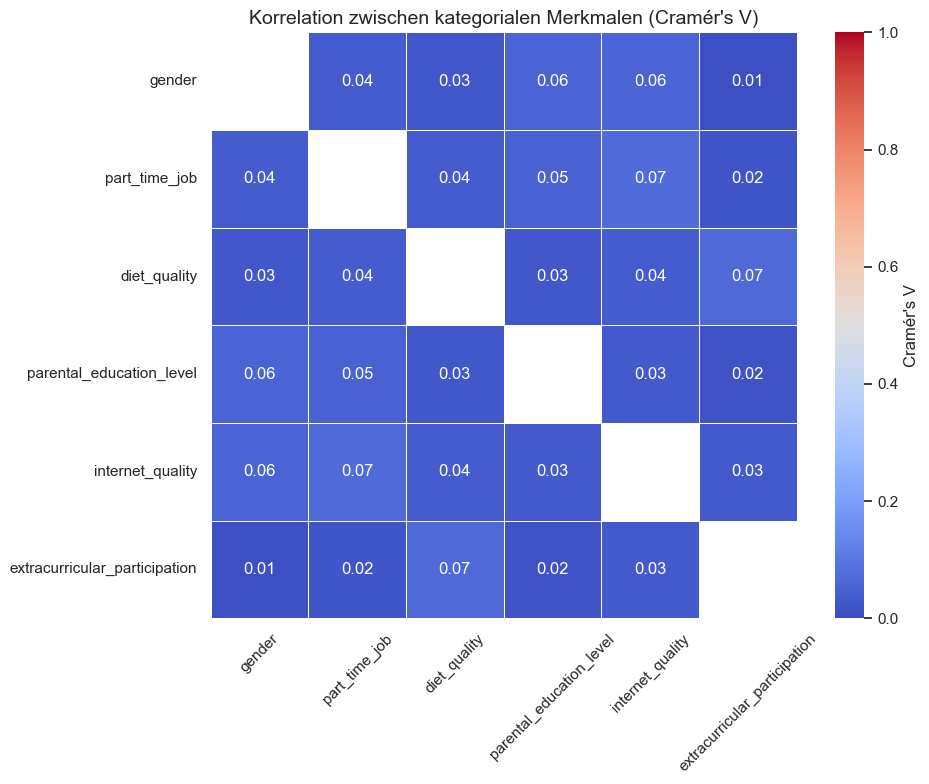

In [5]:
# CSV-Datei laden (Pfad ggf. anpassen)
df = pd.read_csv("data/student_habits_performance.csv")

# Relevante kategoriale Merkmale definieren
categorical_features = [
    'gender',
    'part_time_job',
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation'
]


# Funktion zur Berechnung von Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


# Matrix vorbereiten und Werte füllen
cramers_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for col1, col2 in itertools.combinations(categorical_features, 2):
    val = cramers_v(df[col1], df[col2])
    cramers_matrix.loc[col1, col2] = val
    cramers_matrix.loc[col2, col1] = val

# Diagonale mit 1.0 setzen
np.fill_diagonal(cramers_matrix.values.astype(float), 1.0)

# Umwandlung in Float
cramers_matrix = cramers_matrix.astype(float)

# Stil und Farbanpassung wie bei der numerischen Heatmap
plt.figure(figsize=(10, 8))
sns.set(style="white")
heatmap = sns.heatmap(
    cramers_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # gleiche Farbskala wie bei numerischer Heatmap
    vmin=0,
    vmax=1,
    linewidths=0.5,
    square=True,
    cbar_kws={'label': "Cramér's V"}
)
plt.title("Korrelation zwischen kategorialen Merkmalen (Cramér's V)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

## Korrelation zwischen kategorialen Merkmalen

Im Gegensatz zu numerischen Merkmalen lassen sich kategoriale Merkmale nicht mit der klassischen Pearson-Korrelation vergleichen, da sie keine kontinuierlichen Werte besitzen. Stattdessen wurde in diesem Abschnitt der **Cramér’s V** Koeffizient berechnet, um die Stärke des Zusammenhangs zwischen zwei kategorialen Variablen zu bestimmen.

**Was ist Cramér’s V?**

Cramér’s V ist ein Maß für die Assoziation zwischen zwei kategorialen Variablen. Er basiert auf dem Chi-Quadrat-Test und liefert Werte zwischen **0 (kein Zusammenhang)** und **1 (perfekte Assoziation)**. Dieses Maß ist symmetrisch und eignet sich besonders für nominal skalierte Daten.

### Vorgehensweise:

- Die relevanten kategorialen Merkmale wurden zunächst identifiziert (z.B. `gender`, `diet_quality`, `internet_quality`).
- Für jedes Merkmals-Paar wurde ein Cramér’s V-Wert berechnet.
- Die Ergebnisse wurden in einer symmetrischen Matrix zusammengeführt und mithilfe einer **farbcodierten Heatmap** visualisiert analog zur Darstellung der numerischen Korrelationen.

### Interpretation der Ergebnisse:

Die Analyse zeigt, dass **zwischen den kategorialen Merkmalen keine starke Korrelation** vorliegt. Alle berechneten Werte für Cramér’s V liegen im Bereich zwischen **0.01 und 0.07**, was auf **sehr geringe Zusammenhänge** hindeutet. Die auffälligsten (wenn auch sehr schwachen) Assoziationen bestehen zwischen:

- `internet_quality` und `part_time_job` (Cramér’s V ≈ 0.07)
- `diet_quality` und `extracurricular_participation` (Cramér’s V ≈ 0.07)
- `gender` und `internet_quality` (Cramér’s V ≈ 0.06)

Diese Werte deuten darauf hin, dass in den simulierten Daten nur sehr **lockere Muster** zwischen diesen Merkmalsausprägungen bestehen. Eine inhaltlich belastbare Interpretation ist – wie bereits in der Einleitung zum Datensatz angemerkt – aufgrund der synthetischen Natur der Daten jedoch methodisch nicht möglich.

### Einordnung für die weitere Analyse:

Die geringen Cramér’s V-Werte deuten darauf hin, dass es **keine dominante gegenseitige Beeinflussung der kategorialen Merkmale untereinander** gibt. Für spätere erklärbare Modelle (z.B. mit LIME oder SHAP) bedeutet das, dass **keine offensichtlichen redundanten kategorialen Features** vorliegen, die vorab entfernt werden müssten.

---


## Zusammenhang zwischen kategorialen und numerischen Merkmalen
Zur Analyse, ob kategoriale Merkmale (wie Geschlecht oder Internetqualität) mit numerischen Variablen (wie `exam_score`, `study_hours_per_day` usw.) in Verbindung stehen, wird die Einweg-ANOVA (Analysis of Variance) verwendet. Die ANOVA prüft, ob sich die Mittelwerte der numerischen Merkmale signifikant zwischen den Gruppen eines kategorialen Merkmals unterscheiden.

Ein hoher F-Wert deutet auf einen stärkeren Unterschied zwischen den Gruppen hin, was auf einen möglichen Einfluss hindeuten kann. Die ANOVA gibt keine Kausalität an, ist aber ein nützliches Werkzeug zur Einschätzung der Stärke des Zusammenhangs.

---

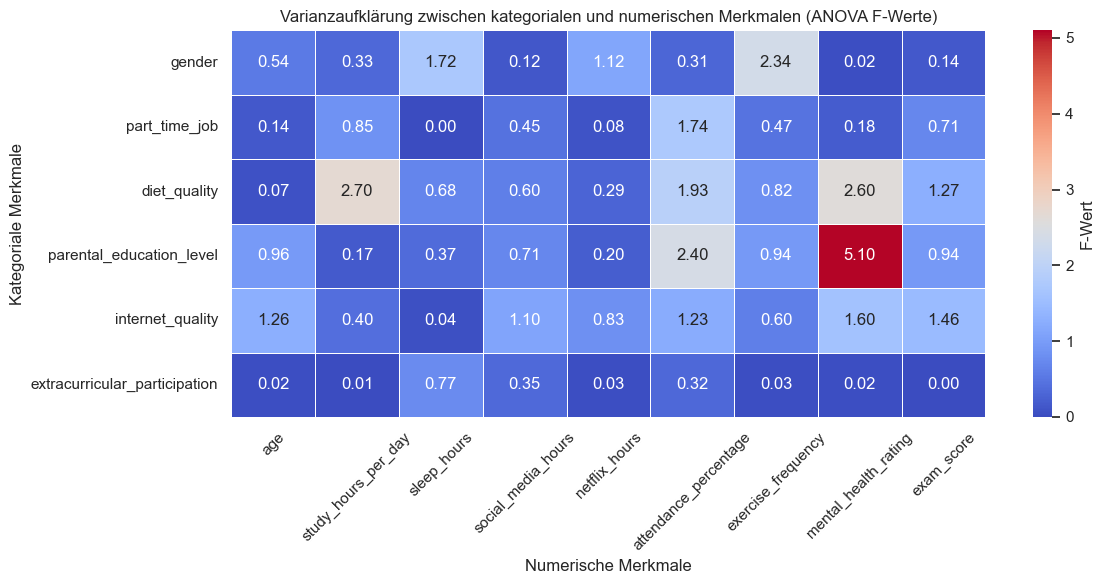

In [6]:
# Schritt 2: Datensatz laden
df = pd.read_csv("data/student_habits_performance.csv")

# Schritt 3: Definition der Merkmalstypen
# Kategoriale Merkmale: Diese Merkmale definieren Gruppen
categorical_features = [
    'gender',
    'part_time_job',
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation'
]

# Numerische Merkmale: Deren Mittelwerte werden in den Gruppen verglichen
numerical_features = [
    'age',
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'exercise_frequency',
    'mental_health_rating',
    'exam_score'
]

# Schritt 4: Vorbereitung der Ergebnisstruktur
# Wir erstellen eine leere Matrix, in die später die ANOVA-F-Werte eingetragen werden
anova_matrix = pd.DataFrame(index=categorical_features, columns=numerical_features)

# Schritt 5: Berechnung der F-Werte mittels ANOVA
# Für jede Kombination von kategorialem und numerischem Merkmal:
for cat in categorical_features:
    for num in numerical_features:
        try:
            # Gruppenbildung: Numerische Werte nach Kategorien gruppieren
            groups = [group[num].dropna().values for _, group in df.groupby(cat)]

            # ANOVA-Test: Gibt F-Wert und p-Wert zurück
            f_stat, p_val = f_oneway(*groups)

            # Ergebnis eintragen (auf zwei Nachkommastellen gerundet)
            anova_matrix.loc[cat, num] = round(f_stat, 2)
        except:
            # Falls Fehler (z. B. zu kleine Gruppen), trage NaN ein
            anova_matrix.loc[cat, num] = np.nan

# Schritt 6: Visualisierung der Ergebnisse als Heatmap
plt.figure(figsize=(12, 6))

# Die Heatmap zeigt F-Werte (Stärke des Gruppeneffekts)
sns.heatmap(
    anova_matrix.astype(float),       # sicherstellen, dass alle Werte numerisch sind
    annot=True,                       # Werte in Zellen anzeigen
    cmap="coolwarm",                  # Farbschema: Blau = niedrig, Rot = hoch
    fmt=".2f",                        # Formatierung der Zahlen mit zwei Dezimalstellen
    linewidths=0.5,                   # Gitterlinien zwischen Feldern
    cbar_kws={'label': 'F-Wert'}      # Farblegende beschriften
)

# Achsentitel und Layout
plt.title("Varianzaufklärung zwischen kategorialen und numerischen Merkmalen (ANOVA F-Werte)")
plt.xlabel("Numerische Merkmale")
plt.ylabel("Kategoriale Merkmale")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### Interpretation der Varianzaufklärung: Kategoriale vs. numerische Merkmale

Die obige Heatmap zeigt die F-Werte einer Einweg-ANOVA, berechnet für alle Kombinationen aus kategorialen und numerischen Merkmalen. Ziel dieser Analyse ist es zu untersuchen, ob sich die Ausprägungen eines numerischen Merkmals systematisch zwischen den Gruppen eines kategorialen Merkmals unterscheiden.

Die F-Werte geben dabei einen Hinweis auf die Stärke des Effekts:
- **Höhere Werte** deuten auf **größere Unterschiede der Mittelwerte** zwischen den Gruppen hin.
- **Niedrige Werte** (< 1) bedeuten, dass **kaum Unterschiede** zwischen den Gruppen festgestellt wurden.
- Diese Analyse ersetzt keine Signifikanzprüfung, liefert aber eine erste Orientierung für interessante Kombinationen.

#### Beobachtungen aus der Matrix

- `parental_education_level` zeigt mit einem **F-Wert von 5.10** in Bezug auf `mental_health_rating` die **stärkste Varianzaufklärung**. Dies könnte bedeuten, dass das psychische Wohlbefinden der Studierenden je nach Bildungsgrad der Eltern leicht unterschiedlich ausfällt.
- Auch `diet_quality` scheint mit `study_hours_per_day` (2.70) und `mental_health_rating` (2.60) eine gewisse Beziehung aufzuweisen. Dies ist plausibel, da Ernährung oft mit Energielevel und Konzentrationsfähigkeit zusammenhängt.
- Die übrigen Merkmale weisen größtenteils **niedrige bis sehr geringe F-Werte** auf. Besonders bei `extracurricular_participation` zeigen sich durchweg sehr geringe Unterschiede was darauf hindeutet, dass diese Variable im aktuellen Datensatz kaum Erklärungswert für numerische Merkmale liefert.

#### Methodische Einordnung

Die ANOVA eignet sich gut, um erste Anhaltspunkte für die Relevanz kategorialer Merkmale zu gewinnen. Die F-Werte lassen sich jedoch **nicht kausal interpretieren**. Außerdem wurden hier keine post-hoc-Tests oder p-Werte berechnet, weshalb die Ergebnisse **als explorativ** zu verstehen sind.

Trotz dieser Einschränkungen liefert diese Matrix wertvolle Hinweise darauf, **welche Merkmale im späteren Modell berücksichtigt** oder bei der Merkmalsskalierung und gewichtung besonders beachtet werden könnten.


---

## Fazit der explorativen Datenanalyse

Die explorative Analyse des Datensatzes lieferte zentrale Erkenntnisse für die spätere Modellierung:

- **Numerische Merkmale** zeigen insgesamt realistische Verteilungen. Besonders auffällig sind:
  - Konzentration der Lernzeit auf niedrige Werte trotz breiter Streuung bei der Prüfungsleistung.
  - Ein Großteil der Studierenden schläft nur 6–7 Stunden. Ein Bereich unterhalb medizinischer Empfehlungen.
  - Netflix- und Social-Media-Nutzung variieren stark, mit vielen Nullangaben.

- **Kategoriale Merkmale** sind vollständig und sinnvoll verteilt, aber größtenteils unabhängig voneinander. Es gab keine stark überrepräsentierten Klassen, jedoch war z.B. „kein Nebenjob“ deutlich häufiger als „mit Nebenjob“.

- **Korrelationen zwischen numerischen Variablen** zeigten:
  - Eine moderate positive Beziehung zwischen Lernzeit und Prüfungsleistung.
  - Keine nennenswerte Korrelation zwischen Anwesenheit und Examensnote, ein eher unerwartetes Ergebnis.
  - Mental Health steht in leicht positivem Zusammenhang zur Leistung.

- **Zwischen kategorialen Variablen** und **in Kombination mit numerischen Merkmalen** ergaben sich keine stark erklärenden Muster. Viele erwartete Zusammenhänge, etwa zwischen Elternbildung oder Ernährung und Prüfungsleistung, konnten nicht bestätigt werden.

Die Analyse liefert somit erste Hinweise darauf, welche Merkmale für erklärbare Modelle später besonders relevant sein könnten, insbesondere Lernzeit, mentale Gesundheit und eventuell sportliche Aktivität. Gleichzeitig verdeutlichen die Ergebnisse, dass manche Variablen, die in der Realität stark wirken, im synthetischen Datensatz nicht zur Geltung kommen.


# Modelltraining: Auswahl, Erklärung und Evaluation

---

## Einleitung

Nach der explorativen Analyse der numerischen und kategorialen Merkmale folgt nun der nächste zentrale Schritt: der Aufbau eines Vorhersagemodells für die Prüfungsleistung (`exam_score`). Ziel ist es, ein möglichst verständliches und gleichzeitig leistungsfähiges Modell zu trainieren, das auf Grundlage studentischer Merkmale wie Lernzeit, Schlafdauer oder mentaler Gesundheit plausible und interpretierbare Vorhersagen liefert.

Das Modelltraining bildet dabei das methodische Bindeglied zwischen den beobachteten Datenstrukturen und den erklärenden Verfahren (XAI), die später zum Einsatz kommen. Es geht also nicht nur darum, ein möglichst genaues Modell zu bauen, sondern eines, das auch erklärbar und nachvollziehbar bleibt.

---

## Zielsetzung

Ziel dieses Abschnitts ist es, ein geeignetes maschinelles Lernverfahren auszuwählen, zu trainieren und zu evaluieren, das den Zusammenhang zwischen den beobachteten Merkmalen und der Zielgröße `exam_score` modelliert. Dabei wird besonders auf Interpretierbarkeit geachtet, um spätere Schritte mit XAI-Methoden wie SHAP oder LIME sinnvoll umsetzen zu können.

---

## Begründung für die Modellauswahl

Für den Einstieg wird ein **lineares Regressionsmodell** verwendet. Dieses Modell ist nicht nur in der Praxis weit verbreitet, sondern bietet auch eine Reihe von Vorteilen im Hinblick auf Erklärbarkeit:

- Es ist mathematisch transparent und gut verständlich.
- Die Modellkoeffizienten geben direkt an, welchen Einfluss jedes Feature auf die Zielgröße hat.
- Die Ergebnisse lassen sich leicht visualisieren und interpretieren.

Die lineare Regression stellt damit eine solide Ausgangsbasis dar, bevor eventuell komplexere Modelle betrachtet werden.

---

## Funktionsweise der linearen Regression

Das Modell basiert auf der Annahme, dass die Zielgröße als gewichtete Summe der Eingabemerkmale dargestellt werden kann:

$$
\hat{y} = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \dots + \beta_n \cdot x_n
$$

Hierbei gilt:

- $\hat{y}$ ist der vorhergesagte `exam_score`.
- $x_i$ sind die Eingabewerte der einzelnen Features.
- $\beta_i$ sind die geschätzten Regressionskoeffizienten.

Ein positiver Koeffizient bedeutet, dass ein höherer Wert des entsprechenden Merkmals mit einem höheren `exam_score` assoziiert ist und umgekehrt.


---

## Nächste Schritte lineare Regression

1. **Datenvorverarbeitung**
   - Kategoriale Merkmale werden mittels One-Hot-Encoding transformiert.
   - Die Daten werden in Trainings- und Testdaten aufgeteilt (z.B. 80/20).
2. **Modelltraining**
   - Das Modell wird mit den Trainingsdaten trainiert.
3. **Modellauswertung**
   - Die Modellgüte wird mit Metriken wie dem mittleren quadratischen Fehler (MSE), dem mittleren absoluten Fehler (MAE) und dem Bestimmtheitsmaß \( R^2 \) bewertet.

---

Die Umsetzung dieser Schritte folgt im nächsten Abschnitt.


[Linear Regression] Mean Squared Error: 26.48
[Linear Regression] R² Score: 0.90


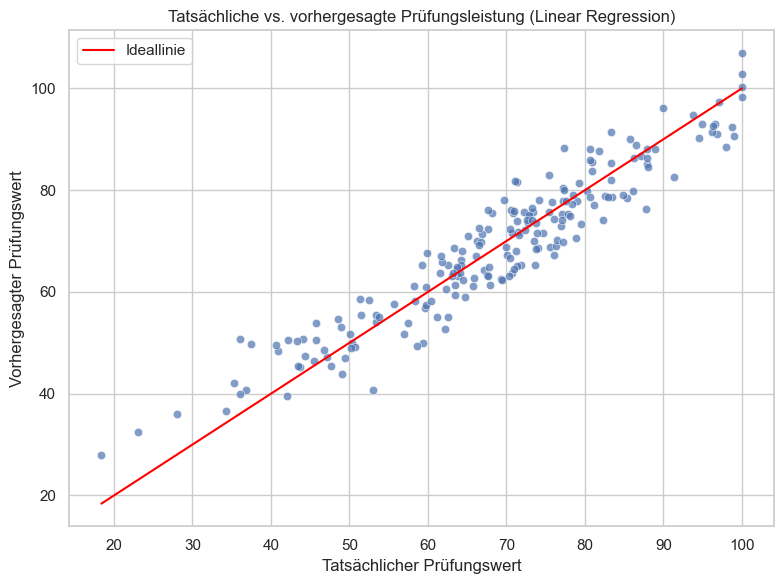

In [7]:
# Stil für Visualisierungen setzen
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Daten einlesen
df = pd.read_csv("data/student_habits_performance.csv")

# Relevante Features und Zielvariable festlegen
X = df.drop(columns=["student_id", "exam_score"])
y = df["exam_score"]

# Kategoriale Features identifizieren
categorical_features = X.select_dtypes(include="object").columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Preprocessing definieren
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

# Modellpipeline definieren: Lineare Regression
model_pipeline_lr = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regression", LinearRegression())
])

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell trainieren
model_pipeline_lr.fit(X_train, y_train)

# Vorhersagen erzeugen
y_pred_lr = model_pipeline_lr.predict(X_test)

# Evaluationsmetriken berechnen
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"[Linear Regression] Mean Squared Error: {mse_lr:.2f}")
print(f"[Linear Regression] R² Score: {r2_lr:.2f}")

# Scatterplot mit Regressionslinie
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color="red", label="Ideallinie")

plt.xlabel("Tatsächlicher Prüfungswert")
plt.ylabel("Vorhergesagter Prüfungswert")
plt.title("Tatsächliche vs. vorhergesagte Prüfungsleistung (Linear Regression)")
plt.legend()
plt.tight_layout()
plt.show()


## Bewertung des linearen Regressionsmodells

Zur Beantwortung der Forschungsfrage wurde ein lineares Regressionsmodell mit allen verfügbaren Merkmalen trainiert. Ziel war es, den Zusammenhang zwischen studentischen Verhaltensweisen und der Prüfungsleistung (`exam_score`) quantitativ zu modellieren und anschließend erklärbar zu machen.

Der folgende Plot zeigt die Gegenüberstellung der tatsächlichen Prüfungswerte aus dem Testdatensatz (x-Achse) und der durch das Modell vorhergesagten Werte (y-Achse). Die rote Linie stellt die ideale 1:1-Beziehung dar, bei der Vorhersage und Realität exakt übereinstimmen würden.

### Modellgüte

Das Modell erreicht einen **R²-Wert von 0.90**, was bedeutet, dass **90% der Varianz in den Prüfungsergebnissen durch die gewählten Merkmale erklärt werden kann**. Der **mittlere quadratische Fehler (MSE)** beträgt **26.48**, was bei einer Skala von 0 bis 100 als sehr solide betrachtet werden kann.

Die Punktewolke folgt der Ideallinie mit relativ geringer Streuung, insbesondere im mittleren Wertebereich. Vereinzelte Abweichungen bei niedrigen oder sehr hohen Prüfungswerten deuten darauf hin, dass extreme Ausprägungen möglicherweise nicht vollständig durch lineare Zusammenhänge abgedeckt werden was für dieses Modell jedoch erwartbar ist.

### Interpretation und Limitationen

Die hohe Modellgüte ist angesichts der **synthetischen Natur des Datensatzes** mit Vorsicht zu interpretieren. Es ist möglich, dass die Generierungslogik des Datensatzes relativ starke lineare Abhängigkeiten zwischen den Merkmalen eingebaut hat. In einem realen Datensatz wäre ein R²-Wert in dieser Höhe ungewöhnlich und müsste kritisch hinterfragt werden.

Nichtsdestotrotz bietet das Modell eine fundierte Grundlage, um auf aggregierter Ebene zu analysieren, welche Merkmale in welchem Umfang zur Vorhersage der Prüfungsleistung beitragen.


---

## Vergleichsmodell: Random Forest Regressor

Um die Ergebnisse der linearen Regression besser einordnen zu können, wird im Folgenden ein alternatives Modell trainiert und analysiert. Dabei handelt es sich um einen **Random Forest Regressor**, ein nicht-lineares Ensemble-Verfahren, das auf der Aggregation vieler Entscheidungsbäume basiert.

Der Random Forest erlaubt es, auch **komplexe, nicht-lineare Zusammenhänge** zwischen den Merkmalen zu modellieren und ist gleichzeitig relativ robust gegenüber Ausreißern und übermäßiger Varianz im Datensatz. Gerade bei synthetischen Daten, bei denen lineare und nicht-lineare Muster gleichzeitig auftreten können, ist es sinnvoll, den Random Forest als leistungsfähigen Referenzpunkt heranzuziehen.

In den folgenden Abschnitten wird das Modell trainiert, evaluiert und hinsichtlich seiner Erklärbarkeit untersucht. Ziel ist es, anschließend systematisch zu entscheiden, ob sich der Random Forest oder die lineare Regression besser für die Analyse der Prüfungsleistung eignet.


[Random Forest] MSE: 38.17
[Random Forest] R²: 0.85


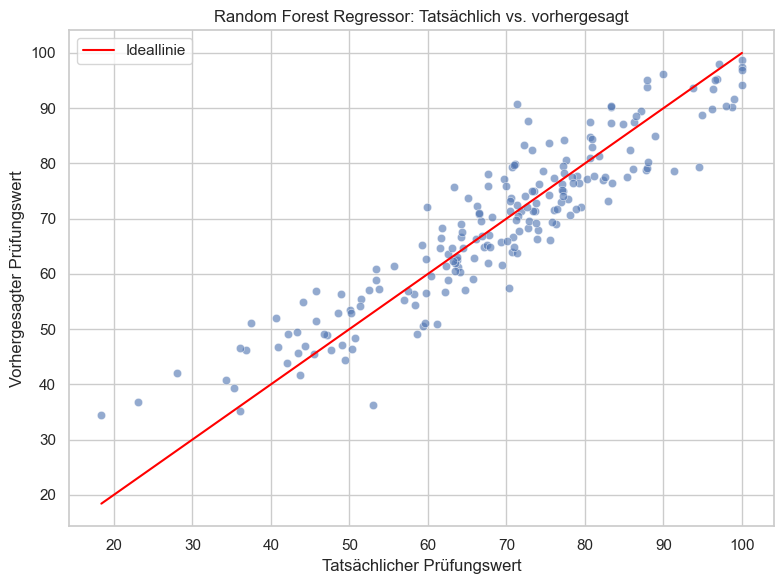

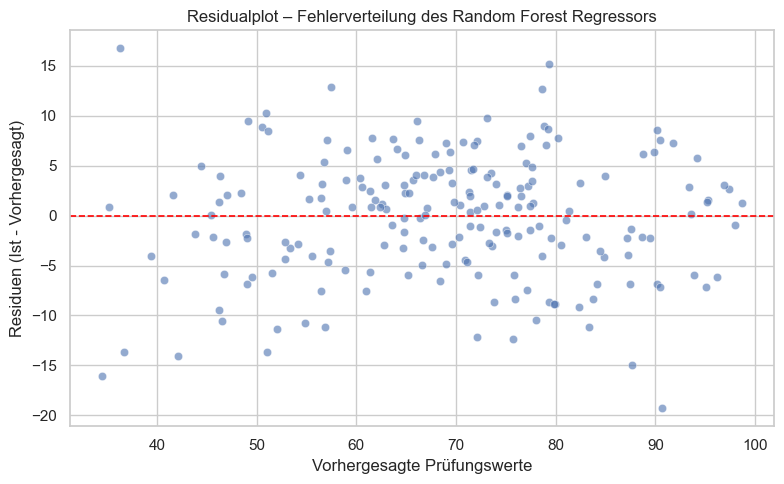

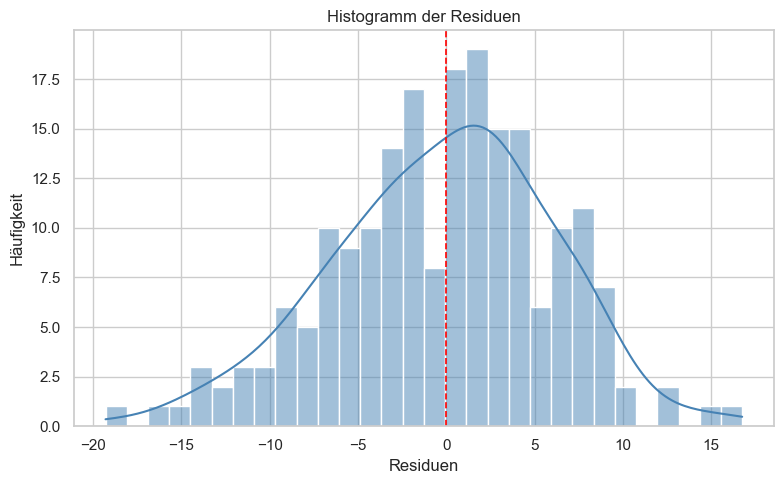

In [8]:


# Stil für die Diagramme setzen
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# CSV-Datei einlesen
df = pd.read_csv("data/student_habits_performance.csv")

# Feature-Matrix (X) und Zielvariable (y) vorbereiten
X = df.drop(columns=["student_id", "exam_score"])
y = df["exam_score"]

# Kategorische Features identifizieren
categorical_features = X.select_dtypes(include="object").columns.tolist()

# Preprocessing-Schritt mit OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

# Pipeline definieren (Preprocessing + Random Forest Modell)
model_pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelltraining
model_pipeline_rf.fit(X_train, y_train)

# Vorhersagen erstellen
y_pred_rf = model_pipeline_rf.predict(X_test)

# Modellgüte evaluieren
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"[Random Forest] MSE: {mse_rf:.2f}")
print(f"[Random Forest] R²: {r2_rf:.2f}")

# Scatterplot zur Modellgüte
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color="red", label="Ideallinie")

plt.xlabel("Tatsächlicher Prüfungswert")
plt.ylabel("Vorhergesagter Prüfungswert")
plt.title("Random Forest Regressor: Tatsächlich vs. vorhergesagt")
plt.legend()
plt.tight_layout()
plt.show()

# Residualplot
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1.2)
plt.xlabel("Vorhergesagte Prüfungswerte")
plt.ylabel("Residuen (Ist - Vorhergesagt)")
plt.title("Residualplot – Fehlerverteilung des Random Forest Regressors")
plt.tight_layout()
plt.show()

# Histogramm der Residuen
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, bins=30, color="steelblue")
plt.axvline(0, color="red", linestyle="--", linewidth=1.2)
plt.xlabel("Residuen")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Residuen")
plt.tight_layout()
plt.show()


## Auswertung des Random-Forest-Modells

Der Random Forest wurde in diesem Projekt als alternatives Regressionsmodell eingesetzt, um die lineare Regression mit einem flexibleren Ansatz zu vergleichen. Dabei ging es vor allem um die Frage, ob sich durch die Modellierung nichtlinearer Zusammenhänge eine verbesserte Vorhersagequalität erzielen lässt.

Die Ergebnisse zeigen, dass das Modell solide performt. Der erreichte **R²-Wert von 0.85** und ein **mittlerer quadratischer Fehler von 38.17** deuten auf eine insgesamt gute Modellanpassung hin. Dennoch liegt die Modellgüte in beiden Kennzahlen leicht unter der der linearen Regression.

Auch die Visualisierungen bestätigen diesen Eindruck. Im Scatterplot liegen die Punkte zwar größtenteils entlang der Ideallinie, die Streuung ist jedoch etwas ausgeprägter als beim linearen Modell. Der Residualplot zeigt eine weitgehend gleichmäßige Fehlerverteilung, allerdings mit einzelnen Ausreißern. Das Histogramm der Residuen wirkt insgesamt symmetrisch, weist aber eine leicht linksseitige Verzerrung auf, was auf eine gewisse systematische Unterschätzung hindeuten könnte.

Aus methodischer Sicht ist außerdem zu beachten, dass der Random Forest als **Blackbox-Modell** keine direkte Einsicht in die Einflussstärke einzelner Merkmale bietet. Um die Ergebnisse dieses Modells interpretierbar zu machen, wären zusätzliche erklärende Verfahren erforderlich.

Trotz guter Leistung zeigt sich also, dass der Random Forest in diesem konkreten Fall nicht nur leicht schwächer abschneidet, sondern auch hinsichtlich der Nachvollziehbarkeit gewisse Nachteile mit sich bringt.


## Vergleich der Modelle: Lineare Regression vs. Random Forest

Nach dem Training und der Auswertung zweier verschiedener Regressionsmodelle – der linearen Regression und des Random Forest Regressors – erfolgt an dieser Stelle eine vergleichende Analyse. Ziel ist es, sowohl ihre Vorhersagekraft als auch ihre Erklärbarkeit zu bewerten, um den weiteren Einsatz beider Modelle im Kontext erklärbarer KI zu begründen. Besonders relevant ist dabei der methodische Vergleich zwischen einem Whitebox- und einem Blackbox-Modell unter Einsatz von SHAP.

### Modellgüte und Vorhersagekraft im Vergleich

Die lineare Regression erzielte im Testdatensatz einen **R²-Wert von 0.90** und einen **mittleren quadratischen Fehler (MSE) von 26.48**. Diese Werte deuten auf eine sehr gute Modellpassung hin – ein Großteil der Varianz in der Zielgröße `exam_score` lässt sich durch die erklärenden Merkmale gut abbilden. Auch die visuelle Darstellung zeigt, dass die Vorhersagen der linearen Regression eng entlang der Ideallinie liegen.

Der Random Forest Regressor kam auf einen **R²-Wert von 0.85** und einen **MSE von 38.17**. Diese Werte sind nach wie vor solide, liegen jedoch hinter denen der linearen Regression. In der grafischen Darstellung sind die Vorhersagen etwas ungenauer und streuen stärker um die Zielgerade. Trotz der grundsätzlich robusten Modellarchitektur ließ sich durch zusätzliche Hyperparameteranpassung keine signifikante Verbesserung erzielen.

### Erklärbarkeit und didaktische Eignung

Ein zentrales Ziel dieses Projekts besteht darin, die Einflüsse von Alltagsverhalten auf die Prüfungsleistung nicht nur zu modellieren, sondern auch **verständlich und datenbasiert zu erklären**. Hier spielt die Modellwahl eine entscheidende Rolle.

Die **lineare Regression** ist als klassisches *Whitebox-Modell* vollständig interpretierbar. Sie erlaubt es, direkte Aussagen über den Einfluss einzelner Merkmale auf die Zielgröße zu treffen – inklusive Vorzeichen und Effektstärke. Das macht sie besonders geeignet für die Herleitung allgemeiner Erklärungsansätze, etwa in der Studienberatung.

Der **Random Forest** gilt hingegen als *Blackbox-Modell*. Zwar liefert er ebenfalls gute Vorhersagen, doch ist die interne Logik durch die Vielzahl verschachtelter Entscheidungsbäume weniger transparent. Gerade deshalb ist er aber besonders interessant für den Einsatz erklärbarer KI-Methoden wie SHAP, die es ermöglichen, auch komplexe Modelle nachvollziehbar zu machen.

### Methodische Entscheidung

Obwohl die lineare Regression die besseren Leistungskennzahlen zeigt, wird **nicht auf den Random Forest verzichtet**. Vielmehr wird er **gezielt beibehalten**, um die Stärken und Schwächen von SHAP als Erklärbarkeitsmethode sowohl auf einem Whitebox- als auch einem Blackbox-Modell zu demonstrieren.

**Für den weiteren Projektverlauf werden daher beide Modelle parallel eingesetzt**:
- Die **lineare Regression** als transparentes, referenzierbares Erklärmodell
- Der **Random Forest** als komplexeres, leistungsfähiges Blackbox-Modell, das durch SHAP aufgeschlüsselt werden soll

Dieser Vergleich unterstützt das Ziel, die Wirkung von Alltagsfaktoren sowohl in einfacher Form als auch in komplexeren Interaktionen sichtbar zu machen.


# Einleitung in erklärbare KI (XAI / Explainable Artificial Intelligence)

Nachdem die Vorhersageleistung der beiden Modelle, der linearen Regression und dem Random Forest Regressor analysiert und verglichen wurde, folgt nun ein Abschnitt, der sich einem zentralen Aspekt datenbasierter Modellierung widmet: der Erklärbarkeit. Besonders bei sensiblen Fragestellungen wie dem Einfluss alltäglicher Verhaltensweisen auf akademische Leistungen reicht es nicht aus, nur präzise Vorhersagen zu treffen – es muss auch nachvollziehbar sein, **warum** ein Modell zu bestimmten Entscheidungen gelangt.

An dieser Stelle kommen Methoden der **erklärbaren künstlichen Intelligenz (XAI)** ins Spiel. Diese ermöglichen es, die Bedeutung einzelner Merkmale sichtbar zu machen – entweder für das Modellverhalten insgesamt (*global*) oder für spezifische Vorhersagen (*lokal*). Sie erhöhen nicht nur die Transparenz, sondern fördern auch das Vertrauen in datenbasierte Entscheidungshilfen.

In diesem Projekt werden zwei unterschiedliche Modellarten – ein **Whitebox-Modell** (lineare Regression) und ein **Blackbox-Modell** (Random Forest) – eingesetzt. Dadurch entsteht eine besonders lehrreiche Ausgangslage für den Einsatz von XAI-Methoden.

Im Fokus steht dabei:

- **SHAP** (*SHapley Additive exPlanations*): Diese Methode basiert auf Konzepten der kooperativen Spieltheorie und weist jedem Merkmal einen Erklärungswert zu. Sie quantifiziert, welchen Beitrag ein Merkmal zur Modellvorhersage leistet – sowohl auf aggregierter Ebene als auch für einzelne Instanzen. SHAP ist mathematisch fundiert, konsistent und eignet sich besonders gut für die Visualisierung strukturierter Zusammenhänge.

Obwohl auch Methoden wie **LIME** (*Local Interpretable Model-agnostic Explanations*) grundsätzlich eingesetzt werden könnten, liegt der Fokus in diesem Projekt vollständig auf SHAP. Der Grund: SHAP erlaubt sowohl für das transparente lineare Regressionsmodell als auch für das komplexere Random-Forest-Modell eine konsistente und vergleichbare Interpretation.

Im nächsten Abschnitt wird SHAP auf beide Modelle angewendet, um zentrale Einflussfaktoren auf die Prüfungsleistung sichtbar zu machen und Unterschiede in der Merkmalbedeutung zwischen Whitebox- und Blackbox-Modell herauszuarbeiten.


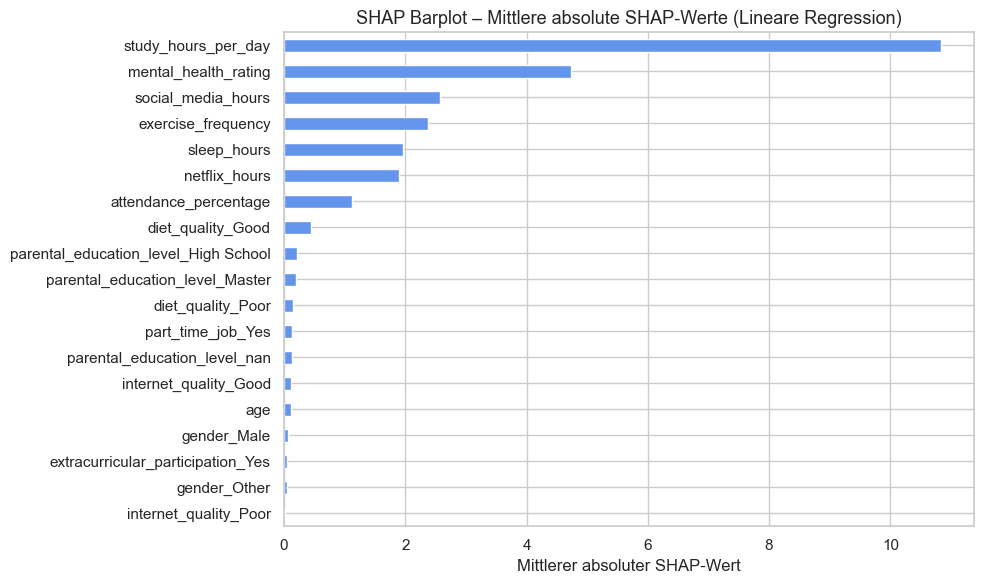

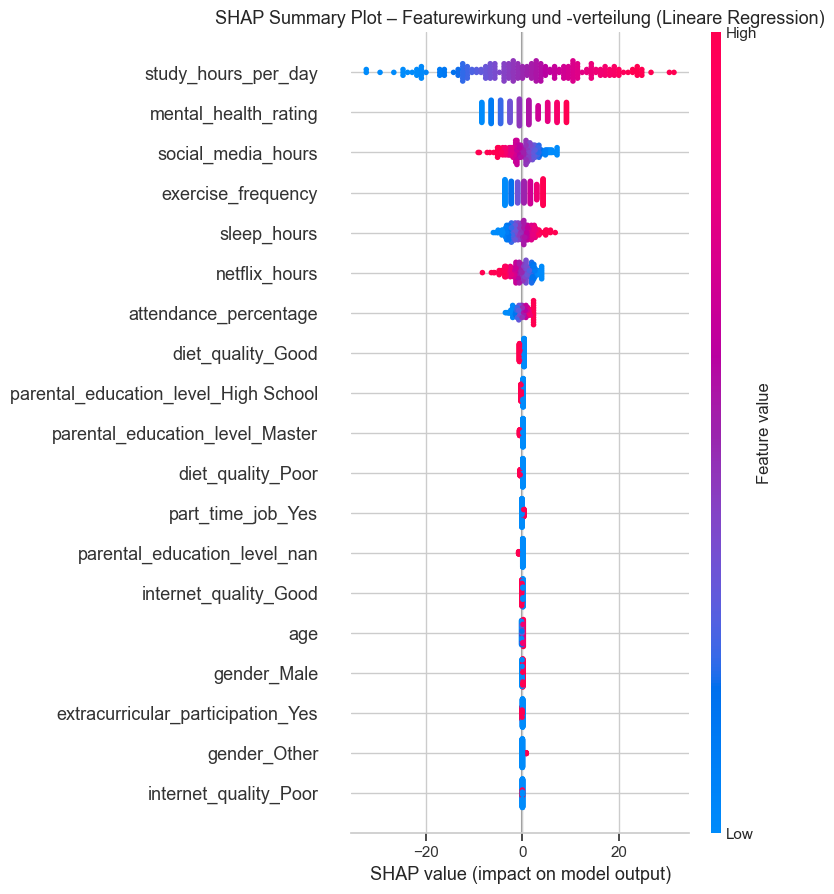

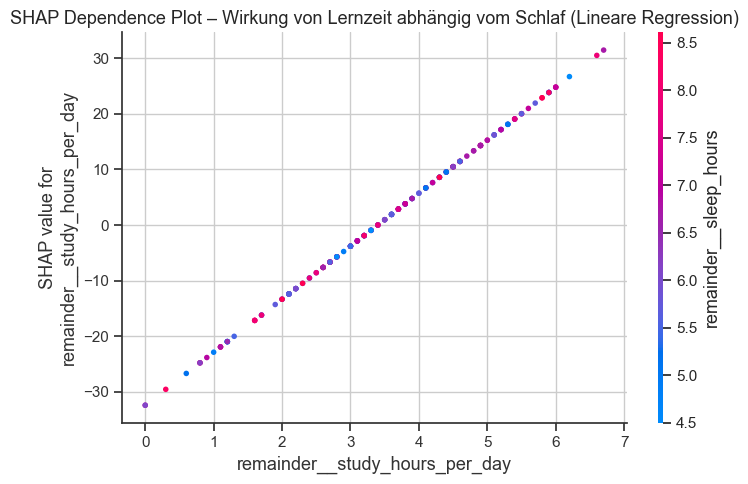

In [9]:

# 1. SHAP vorbereiten
preprocessor_lr = model_pipeline_lr.named_steps["preprocessing"]
model_lr = model_pipeline_lr.named_steps["regression"]
X_test_transformed_lr = preprocessor_lr.transform(X_test)
feature_names_lr = preprocessor_lr.get_feature_names_out()

# 2. Feature-Namen bereinigen (entfernt technische Präfixe)
def simplify_feature_names(feature_names):
    return [name.replace("cat__", "").replace("remainder__", "") for name in feature_names]

feature_names_clean = simplify_feature_names(feature_names_lr)

# 3. SHAP-Werte berechnen (für lineares Modell)
explainer_lr = shap.LinearExplainer(model_lr, X_test_transformed_lr)
shap_values_lr = explainer_lr(X_test_transformed_lr).values

# 4. Barplot – mittlere absolute SHAP-Werte pro Feature
shap_df_lr = pd.DataFrame(np.abs(shap_values_lr), columns=feature_names_clean)
shap_summary_full = shap_df_lr.mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
shap_summary_full.plot(kind='barh', color='cornflowerblue')
plt.title("SHAP Barplot – Mittlere absolute SHAP-Werte (Lineare Regression)", fontsize=13)
plt.xlabel("Mittlerer absoluter SHAP-Wert")
plt.tight_layout()
plt.show()

# 5. Summary Plot – zeigt Richtung & Verteilung der Effekte
plt.title("SHAP Summary Plot – Featurewirkung und -verteilung (Lineare Regression)", fontsize=13)
shap.summary_plot(
    shap_values_lr,
    X_test_transformed_lr,
    feature_names=feature_names_clean
)

# 6. Dependence Plot – zeigt Effekt von Lernzeit abhängig vom Schlaf
shap.dependence_plot(
    ind="remainder__study_hours_per_day",              # originaler Feature-Name!
    shap_values=shap_values_lr,
    features=X_test_transformed_lr,
    feature_names=feature_names_lr,                    # original-Namen, nicht bereinigt!
    interaction_index="remainder__sleep_hours",
    show=False                                          # verhindert automatische Anzeige
)

plt.title("SHAP Dependence Plot – Wirkung von Lernzeit abhängig vom Schlaf (Lineare Regression)", fontsize=13)
plt.tight_layout()
plt.show()




### SHAP Barplot – Globale Bedeutung der Merkmale

**Methode:** SHAP (SHapley Additive exPlanations) berechnet den durchschnittlichen Beitrag jedes Merkmals zur Modellvorhersage. In diesem Barplot werden die **mittleren absoluten SHAP-Werte** aller Features dargestellt. Je höher, desto stärker beeinflusst ein Merkmal das Ergebnis.

**Ziel:** Identifikation der global wichtigsten Einflussfaktoren auf die vorhergesagte Prüfungsleistung.

**Erwartungsgemäße Befunde:**
- Es war zu erwarten, dass `study_hours_per_day` (tägliche Lernzeit) das Modell stark beeinflusst, da mehr Lernzeit typischerweise mit besseren Leistungen korreliert.
- Auch `mental_health_rating` (subjektive Einschätzung der psychischen Verfassung) ist plausibel: Mentale Stabilität kann die Konzentration, Ausdauer und Motivation verbessern.

**Unerwartetes / Auffälliges:**
- Überraschend deutlich ist der Abstand der beiden Top-Features zum Rest: Der Einfluss anderer Merkmale fällt stark ab.
- `social_media_hours` und `netflix_hours` haben zwar einen Effekt, aber kleiner als erwartet – möglicherweise, weil sie in der Regel **nicht extrem ausgeprägt** sind oder **mit Lernzeit negativ korreliert** sind (multikollinear).
- Einige Merkmale wie `diet_quality`, `internet_quality` oder `parental_education_level` zeigen **nahezu keinen Effekt**, obwohl man annehmen könnte, dass sie indirekt relevant sind.

**Fazit:** Das Modell fokussiert sich stark auf **Verhalten und mentale Verfassung**, strukturelle oder demografische Merkmale spielen eine untergeordnete Rolle.


### SHAP Summary Plot – Wirkung und Streuung der Merkmalseffekte

**Methode:** Der Summary Plot kombiniert Feature-Wichtigkeit (Rangfolge) mit der **Wirkungsrichtung** (SHAP-Wert positiv oder negativ) und der **Verteilung der Merkmalsausprägungen** (Farbskala).

**Ziel:** Besseres Verständnis darüber, **wie** ein Merkmal wirkt: z.B. ob hohe Werte die Leistung fördern oder senken.

**Erwartungsgemäße Befunde:**
- Höhere `study_hours_per_day` führen zu höheren Vorhersagen (pink Punkte rechts). Genau wie erwartet.
- Auch bei `mental_health_rating` ergibt sich ein klar positiver Zusammenhang: Personen mit stabiler mentaler Gesundheit erzielen tendenziell bessere Leistungen.

**Unerwartetes / Interessantes:**
- `social_media_hours`: Höhere Werte (pink) liegen häufig auf der linken Seite → **mehr Nutzung senkt die vorhergesagte Leistung**. Das passt zu typischen Hypothesen, ist aber erfreulich klar sichtbar.
- `sleep_hours`: zeigt **ein gemischtes Bild**, was auf einen **nicht-linearen Zusammenhang** hinweist. Eventuell gibt es ein "Optimum" an Schlaf.
- `attendance_percentage` hat nur moderaten Einfluss, obwohl man eine stärkere Rolle vermuten könnte – eventuell, weil sie mit anderen Faktoren (z.B. Lernzeit) korreliert und das Modell daher den **direkteren Effekt bevorzugt**.

**Fazit:** Die Summary-Darstellung hilft, plausible Zusammenhänge empirisch zu bestätigen. Gleichzeitig zeigt sie aber auch, dass manche vermeintlich „wichtige“ Merkmale (z.B. Ernährung, Elternbildung) **weniger Einfluss** haben als erwartet.


### SHAP Dependence Plot – Lernzeit in Wechselwirkung mit Schlafdauer

**Methode:** Darstellung der SHAP-Werte für `study_hours_per_day`, gefärbt nach `sleep_hours`, um Interaktionen visuell erkennbar zu machen.

**Ziel:** Sichtbarmachung des Zusammenhangs zwischen Lernverhalten und Modellvorhersage, sowie möglicher Verstärker oder Dämpfungseffekte durch Schlafverhalten.

**Erwartungsgemäße Befunde:**
- Der lineare Anstieg der SHAP-Werte mit steigender Lernzeit ist logisch. Jede zusätzliche Lernstunde wirkt sich **gleichmäßig positiv** auf die vorhergesagte Leistung aus.
- Die Farbskala (Interaktion mit Schlafdauer) zeigt einen subtilen Effekt: Bei höherem Schlaf (pink) ist der Lernzeit-Effekt leicht verstärkt. Auch das passt zum allgemeinen Verständnis von Leistungsförderung.

**Unerwartetes / Auffälliges:**
- Die lineare Beziehung ist **außergewöhnlich klar**. In der Realität wären abnehmende Grenzerträge (z.B. Ermüdung bei >6h Lernen) denkbar. Das Modell bildet solche **nicht-linearen Schwellen** hier nicht ab, was an der Einfachheit der linearen Regression liegen kann.
- Die Schlafinteraktion ist **relativ schwach**, eventuell müsste sie explizit modelliert werden (z.B. als Interaktionsterm), um differenziertere Effekte abzubilden.

**Fazit:** Der Plot zeigt eine starke und erwartbare Haupteffektbeziehung – und eine leichte, aber potenziell optimierbare Interaktion.


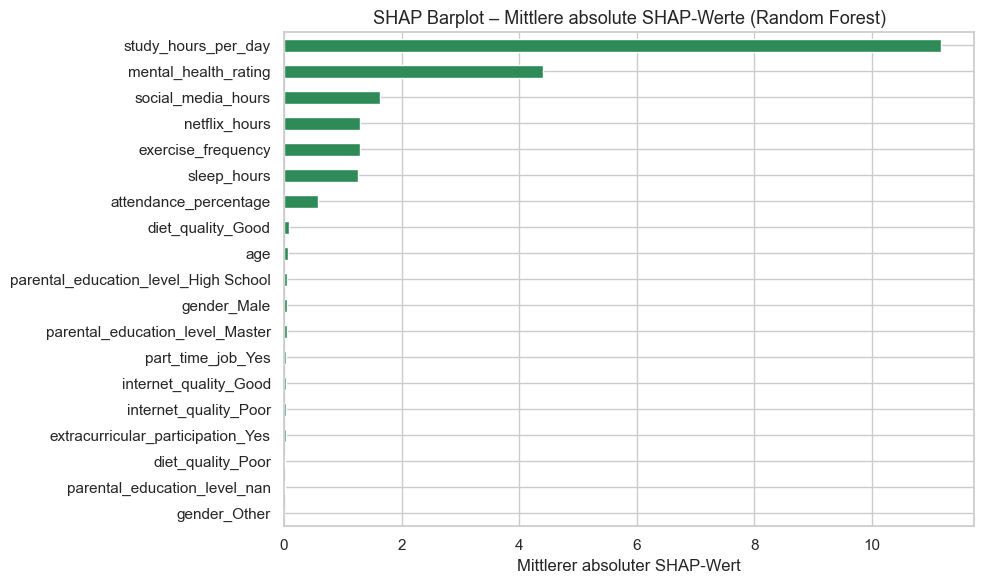

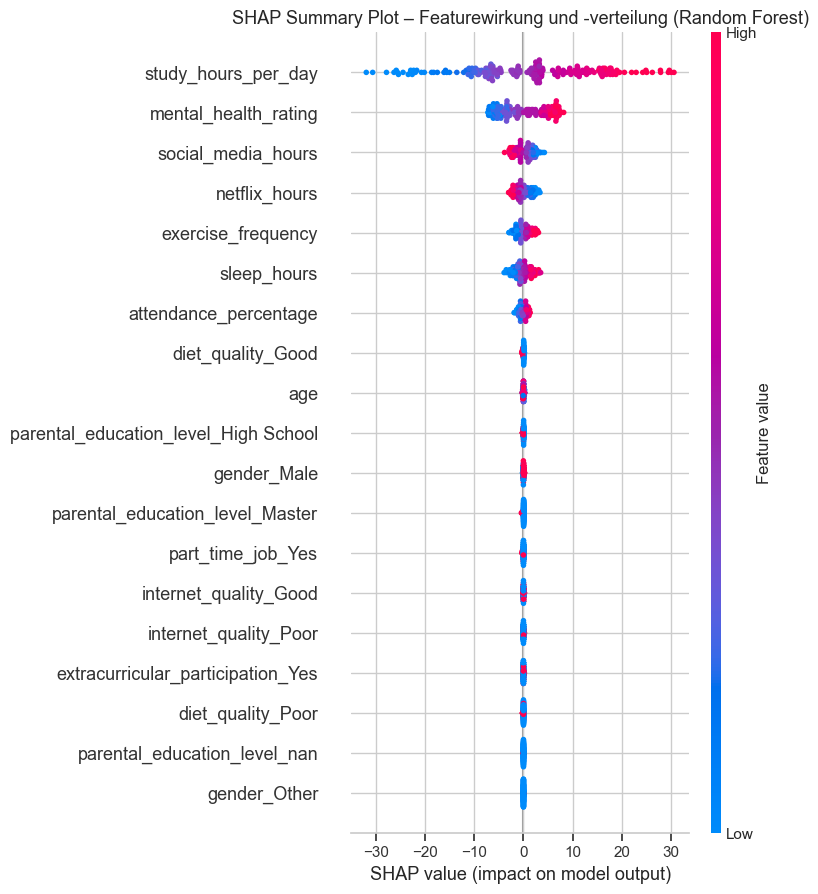

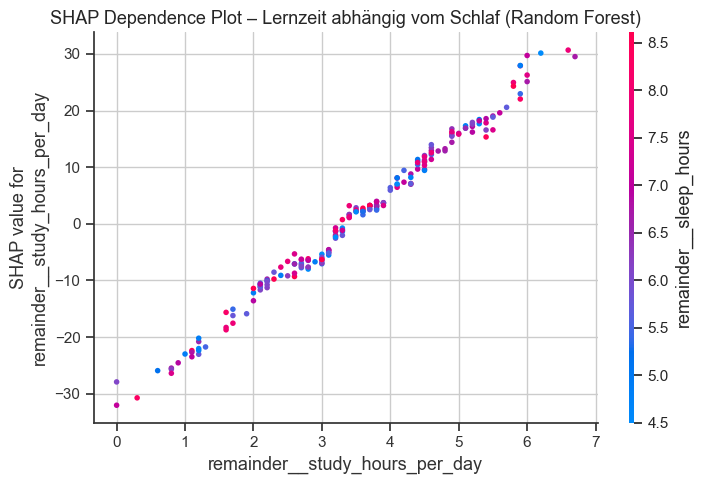

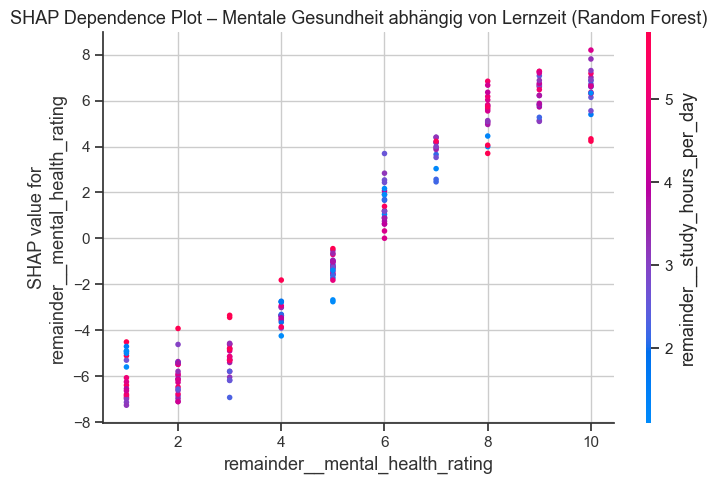

In [10]:


# 1. SHAP vorbereiten
preprocessor_rf = model_pipeline_rf.named_steps["preprocessing"]
model_rf = model_pipeline_rf.named_steps["regressor"]
X_test_transformed_rf = preprocessor_rf.transform(X_test)
feature_names_rf = preprocessor_rf.get_feature_names_out()

# 2. Feature-Namen bereinigen
def simplify_feature_names(feature_names):
    return [name.replace("cat__", "").replace("remainder__", "") for name in feature_names]

feature_names_clean_rf = simplify_feature_names(feature_names_rf)

# 3. SHAP-Werte berechnen (für Random Forest)
explainer_rf = shap.Explainer(model_rf, X_test_transformed_rf)
shap_values_rf = explainer_rf(X_test_transformed_rf, check_additivity=False).values

# 4. Barplot – mittlere absolute SHAP-Werte
shap_df_rf = pd.DataFrame(np.abs(shap_values_rf), columns=feature_names_clean_rf)
shap_summary_rf = shap_df_rf.mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
shap_summary_rf.plot(kind='barh', color='seagreen')
plt.title("SHAP Barplot – Mittlere absolute SHAP-Werte (Random Forest)", fontsize=13)
plt.xlabel("Mittlerer absoluter SHAP-Wert")
plt.tight_layout()
plt.show()

# 5. SHAP Summary Plot
plt.title("SHAP Summary Plot – Featurewirkung und -verteilung (Random Forest)", fontsize=13)
shap.summary_plot(
    shap_values_rf,
    X_test_transformed_rf,
    feature_names=feature_names_clean_rf
)

# 6a. Dependence Plot: study_hours_per_day abhängig von sleep_hours
shap.dependence_plot(
    ind="remainder__study_hours_per_day",
    shap_values=shap_values_rf,
    features=X_test_transformed_rf,
    feature_names=feature_names_rf,
    interaction_index="remainder__sleep_hours",
    show=False
)
plt.title("SHAP Dependence Plot – Lernzeit abhängig vom Schlaf (Random Forest)", fontsize=13)
plt.tight_layout()
plt.show()

# 6b. Dependence Plot: mental_health_rating abhängig von study_hours_per_day
shap.dependence_plot(
    ind="remainder__mental_health_rating",
    shap_values=shap_values_rf,
    features=X_test_transformed_rf,
    feature_names=feature_names_rf,
    interaction_index="remainder__study_hours_per_day",
    show=False
)
plt.title("SHAP Dependence Plot – Mentale Gesundheit abhängig von Lernzeit (Random Forest)", fontsize=13)
plt.tight_layout()
plt.show()


### SHAP Barplot – Globale Bedeutung der Merkmale (Random Forest)

**Methode:** Diese Visualisierung basiert auf SHAP (SHapley Additive exPlanations). Für jedes Merkmal wird der mittlere absolute Einfluss auf die Modellvorhersage berechnet d.h. wie stark ein Merkmal über alle Testbeobachtungen hinweg zur Prognose beiträgt.

**Ziel:** Die globale Wichtigkeit von Features innerhalb des Random-Forest-Modells sichtbar machen.

**Erwartet:**
- `study_hours_per_day` ist mit großem Abstand das wichtigste Merkmal konsistent mit der linearen Regression.
- `mental_health_rating` ist ebenfalls sehr bedeutsam. Mentale Stabilität scheint in beiden Modellarten ein Schlüsselfaktor für Prüfungsleistung zu sein.

**Unerwartet / Bemerkenswert:**
- Der Einfluss struktureller Merkmale (z.B. `parental_education_level`, `gender`) bleibt sehr gering, obwohl Random Forest auch Interaktionen abbilden kann.
- `sleep_hours` und `exercise_frequency` gewinnen im Vergleich zum linearen Modell leicht an Bedeutung. Das spricht für nicht-lineare Wechselwirkungen, die dort nicht modelliert wurden.

**Fazit:** Der Random Forest erkennt ähnliche Haupttreiber wie das lineare Modell, gewichtet aber einzelne sekundäre Merkmale leicht anders. SHAP macht diese Nuancen transparent und nachvollziehbar.


### SHAP Summary Plot – Verteilung und Richtung der Merkmalseffekte (Random Forest)

**Methode:** Jeder Punkt stellt den Einfluss eines Merkmals auf die Modellvorhersage für eine einzelne Testinstanz dar. Die Farbe gibt die Merkmalsausprägung an (hoch = pink, niedrig = blau), die horizontale Lage zeigt, ob der Einfluss positiv oder negativ war.

**Ziel:** Analyse, welche Merkmale in welcher Weise wirken  und ob sich **nicht-lineare Beziehungen oder Interaktionseffekte** zeigen.

**Erwartet:**
- `study_hours_per_day`: Deutlich positiver Effekt bei hohen Werten.
- `mental_health_rating`: Ebenfalls wie erwartet positiver Zusammenhang.

**Unerwartet / Interessant:**
- `social_media_hours`: Die Verteilung ist deutlich asymmetrisch – hohe Werte (pink) führen meist zu negativen SHAP-Werten, was auf **Ablenkungspotenzial** hinweist.
- `sleep_hours`: Farblich gemischt über das gesamte SHAP-Wertspektrum → ein Hinweis auf ein **nicht-monotones Verhalten** (z.B. zu viel Schlaf kann ebenso schaden wie zu wenig).
- Der Plot zeigt insgesamt deutlich mehr **Streuung und komplexe Muster** als im linearen Modell. Typisch für Random Forest.

**Fazit:** Der Summary Plot macht sichtbar, dass der Random Forest nicht nur lineare Zusammenhänge erkennt, sondern auch **nicht-lineare Wechselwirkungen zwischen Features**. SHAP übersetzt diese komplexen Muster in verständliche Visualisierungen.


### SHAP Dependence Plot – Lernzeit in Wechselwirkung mit Schlafdauer (Random Forest)

**Methode:** Darstellung des SHAP-Werts für `study_hours_per_day` über alle Instanzen hinweg. Die Punkte sind eingefärbt nach `sleep_hours`, um mögliche Interaktionseffekte zu erkennen.

**Ziel:** Herausfinden, ob der Zusammenhang zwischen Lernzeit und Leistung linear bleibt – oder ob sich z.B. Sättigungseffekte zeigen.

**Erwartet:**
- Der SHAP-Wert steigt mit zunehmender Lernzeit – je mehr gelernt wird, desto besser ist die Vorhersage.

**Unerwartet / Auffällig:**
- Der Anstieg ist nicht streng linear: Zwischen ca. 5 und 6 Stunden flacht der Effekt ab, bei ca. 6–7 Stunden wirkt er instabil → **Hinweis auf abnehmende Grenznutzen**.
- Die Farbverläufe zeigen, dass viel Schlaf tendenziell den positiven Effekt unterstützt – allerdings ist der Effekt weniger klar als beim linearen Modell.

**Fazit:** Random Forest erlaubt ein differenzierteres Verständnis darüber, **wann Lernzeit ihre Wirkung verliert**. SHAP zeigt: Lernzeit ist wichtig – aber nicht unbegrenzt.


### SHAP Dependence Plot – Mentale Gesundheit in Wechselwirkung mit Lernverhalten (Random Forest)

**Methode:** SHAP-Werte für `mental_health_rating` werden dargestellt, eingefärbt nach `study_hours_per_day`.

**Ziel:** Untersuchung, wie stark mentale Gesundheit den Output beeinflusst – und ob dies abhängig vom Lernverhalten variiert.

**Erwartet:**
- Positiver Zusammenhang: Je besser die mentale Verfassung, desto höher fällt die vorhergesagte Prüfungsleistung aus.

**Unerwartet / Bemerkenswert:**
- Bei gleichem `mental_health_rating` zeigt sich deutliche Streuung in den SHAP-Werten – je nachdem, wie viel zusätzlich gelernt wurde.
→ Mentale Gesundheit entfaltet ihre Wirkung also besonders **in Verbindung mit aktivem Lernverhalten**.
- Ohne nennenswerte Lernzeit (blaue Punkte) bleibt der Effekt begrenzt. Psychisches Wohlbefinden allein reicht nicht aus, um hohe Leistungen zu prognostizieren.

**Fazit:** Der Plot legt nahe, dass **mentale Gesundheit ein Verstärker, aber kein Ersatz für aktives Lernen** ist. Diese Differenzierung ist mit linearen Modellen schwer zu erfassen. SHAP plus Random Forest zeigen sie deutlich.


# Vergleich der erklärbaren Modelle: Lineare Regression vs. Random Forest

**Ziel des Vergleichs:**
Beide Modelle wurden hinsichtlich ihrer erklärbaren Struktur mittels SHAP analysiert. Während die lineare Regression als **White-Box-Modell** per se interpretierbar ist, stellt der Random Forest ein **Black-Box-Modell** dar, das nur durch XAI-Methoden wie SHAP erklärbar gemacht werden kann.

**Gemeinsamkeiten:**
- In beiden Modellen zeigt sich `study_hours_per_day` als wichtigstes Merkmal. Ein stabiler, domänenplausibler Haupteffekt.
- Auch `mental_health_rating` und `social_media_hours` sind in beiden Fällen erklärungsrelevant, was für eine gewisse **Modellrobustheit** spricht.

**Unterschiede:**
- Die lineare Regression zeigt klare, oft monotone Effekte (z.B. linearer Anstieg mit Lernzeit), wohingegen der Random Forest **nicht-lineare Muster** und **abnehmende Grenznutzen** (z.B. bei Lernzeit oder Schlaf) sichtbar macht.
- Der Random Forest erkennt auch **komplexe Interaktionen**: z.B. die verstärkte Wirkung von mentaler Gesundheit bei hoher Lernzeit, ein Effekt der im linearen Modell nicht deutlich wurde.
- Die Summary Plots des Random Forest zeigen eine deutlich **breitere Streuung**, was auf eine **größere Modellflexibilität** bei der Berücksichtigung individueller Fallkontexte hinweist.

**Fazit:**
Der Einsatz von SHAP erlaubt es, sowohl das simple lineare Modell als auch den komplexeren Random Forest auf ein gemeinsames Erklärbarkeitsniveau zu bringen.
Während die lineare Regression eher **globale Tendenzen** sichtbar macht, zeigt der Random Forest, unterstützt durch SHAP, auch **lokale und nicht-lineare Zusammenhänge**, die für datengestützte Hypothesenbildung besonders wertvoll sind.


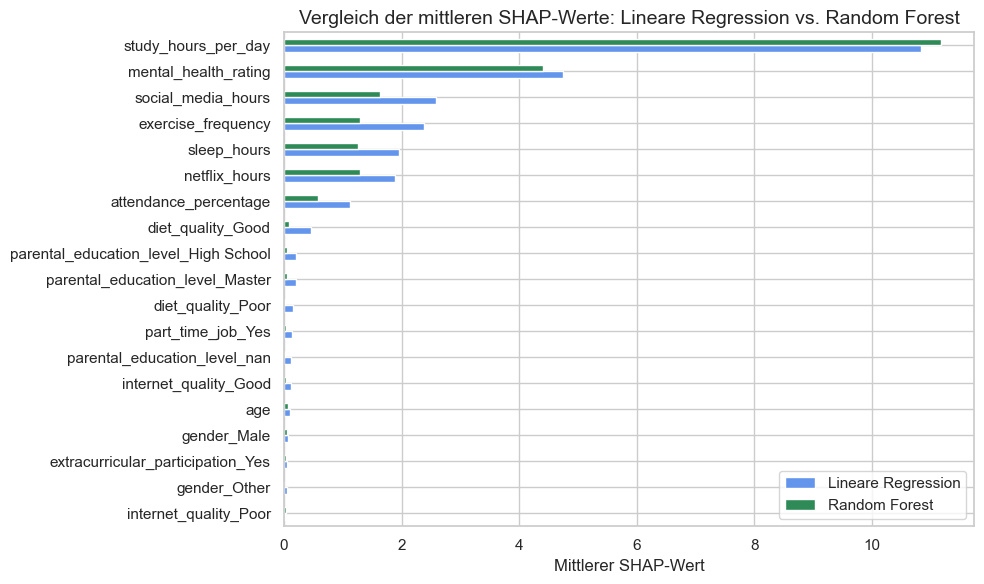

In [11]:

# DataFrames mit mittleren SHAP-Werten (bereits berechnet)
# Stelle sicher, dass shap_summary_full und shap_summary_rf vorhanden sind
# und jeweils ein pd.Series mit gleichen Indexnamen (Feature-Namen) darstellen

# Beispiel:
# shap_summary_full = pd.Series([...], name="Lineare Regression")
# shap_summary_rf = pd.Series([...], name="Random Forest")

# Gemeinsamer DataFrame zum Vergleich
df_compare = pd.DataFrame({
    "Lineare Regression": shap_summary_full,
    "Random Forest": shap_summary_rf
}).dropna()

# Sortieren nach linearer Regression für konsistente Reihenfolge
df_compare = df_compare.sort_values("Lineare Regression", ascending=True)

# Barplot
ax = df_compare.plot(
    kind="barh",
    figsize=(10, 6),
    color=["cornflowerblue", "seagreen"]
)

plt.title("Vergleich der mittleren SHAP-Werte: Lineare Regression vs. Random Forest", fontsize=14)
plt.xlabel("Mittlerer SHAP-Wert")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


### Vergleich der globalen SHAP-Werte – Lineare Regression vs. Random Forest

**Ziel:**
Diese Visualisierung zeigt die mittleren absoluten SHAP-Werte der einzelnen Merkmale in beiden Modellen – nebeneinander dargestellt. So lässt sich direkt erkennen, ob die Modelle zu ähnlichen Einschätzungen kommen oder bestimmte Einflussgrößen unterschiedlich bewerten.

**Interpretation:**
- Beide Modelle identifizieren `study_hours_per_day` als dominantestes Merkmal – das unterstreicht die Robustheit dieses Zusammenhangs.
- Auch `mental_health_rating` ist in beiden Modellen stark gewichtet, jedoch in der linearen Regression noch etwas deutlicher – was für einen konsistent linearen Effekt spricht.
- `social_media_hours` und `exercise_frequency` werden im linearen Modell stärker betont, während beim Random Forest `diet_quality_Good` und `sleep_hours` etwas mehr Gewicht erhalten.
- Merkmale wie `gender`, `internet_quality` oder `parental_education_level` spielen in beiden Modellen eine untergeordnete Rolle.

**Fazit:**
Das Ergebnis zeigt, dass beide Modelle zwar zentrale Einflussfaktoren ähnlich erkennen, der Random Forest aber auch **nicht-lineare Muster und subtilere Zusammenhänge** berücksichtigt, was sich in leicht abweichenden Gewichtungen niederschlägt. Die lineare Regression legt den Fokus auf **starke, direkt lineare Beziehungen**, während der Random Forest auch **kontextuelle oder kombinierte Effekte** erfasst.


# Schwellenwertanalyse einzelner Merkmale

In diesem Abschnitt untersuche ich, **ab wann ein Merkmal einen positiven oder negativen Einfluss auf die Modellvorhersage hat** – und ob es möglicherweise Schwellenwerte oder Wendepunkte gibt, ab denen sich der Effekt umkehrt.

Dazu wird der Zusammenhang zwischen dem **Merkmalswert** (x-Achse) und dem dazugehörigen **SHAP-Wert** (y-Achse) visualisiert.
Der SHAP-Wert zeigt, **wie stark und in welche Richtung** das jeweilige Merkmal die Modellvorhersage verändert.

**Ziel:**
Nicht nur zu wissen, dass ein Merkmal wichtig ist, sondern **wie genau es wirkt**. Gibt es z.B. eine Schlafdauer, bei der sich der Einfluss auf die Leistung ändert? Oder einen Punkt, an dem zu viel Lernen nicht mehr hilft?

Die nachfolgende Visualisierung liefert eine erste datenbasierte Antwort auf solche Fragen.


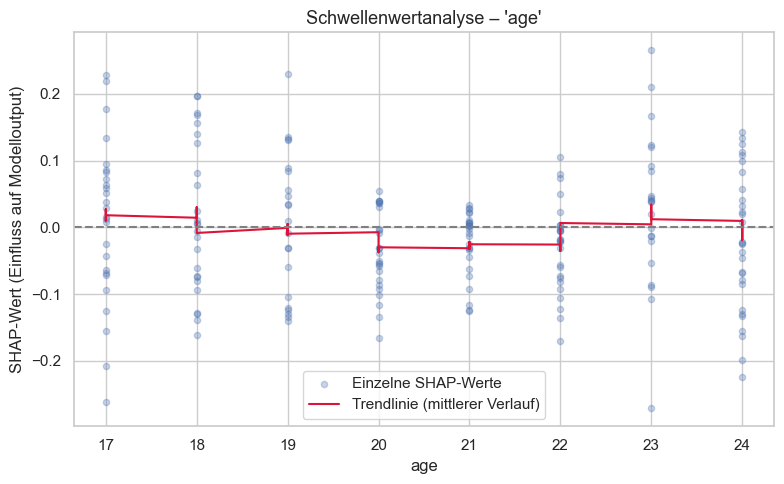

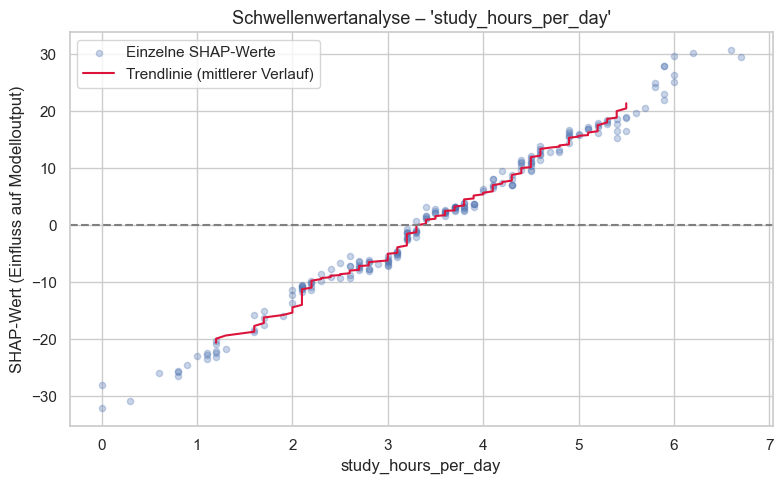

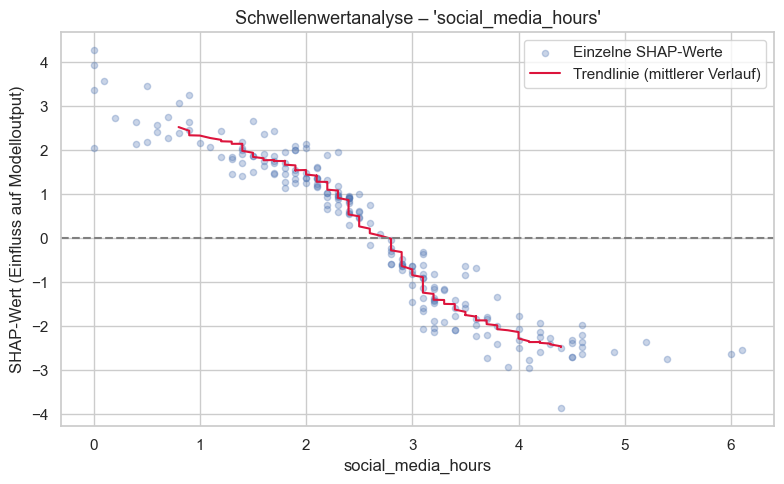

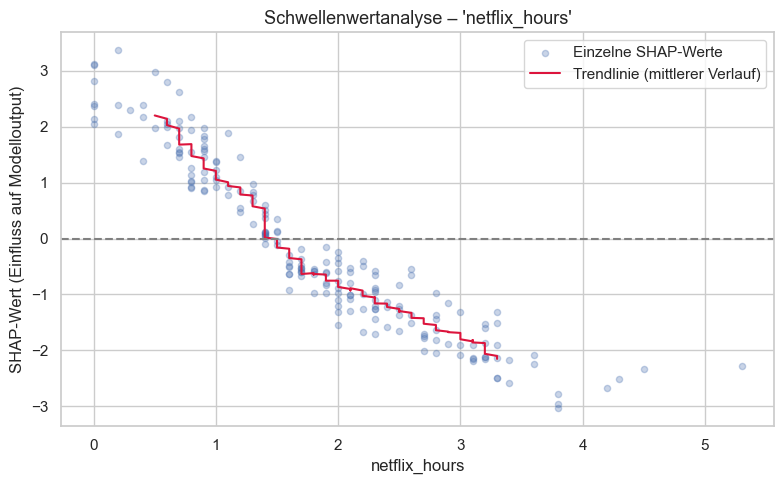

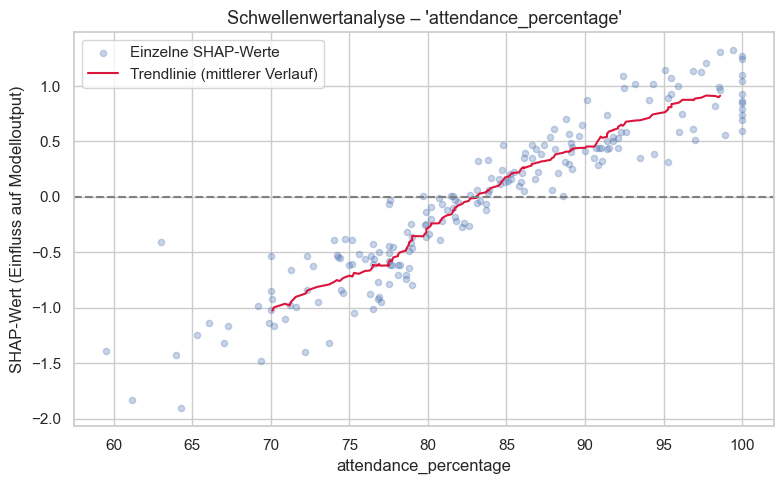

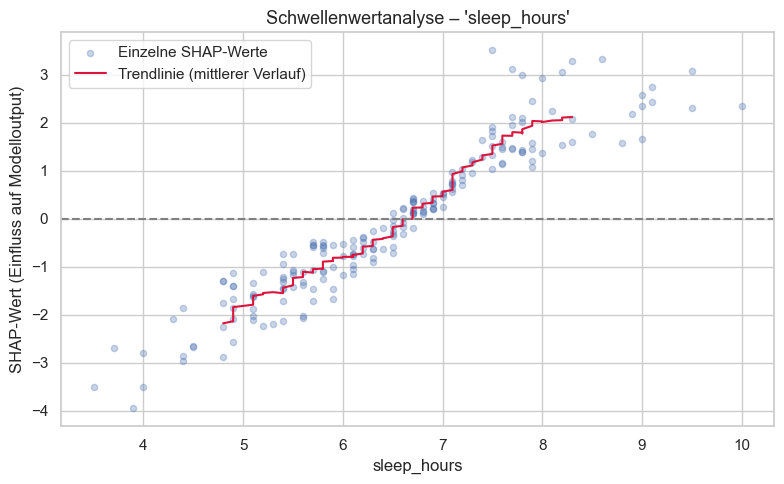

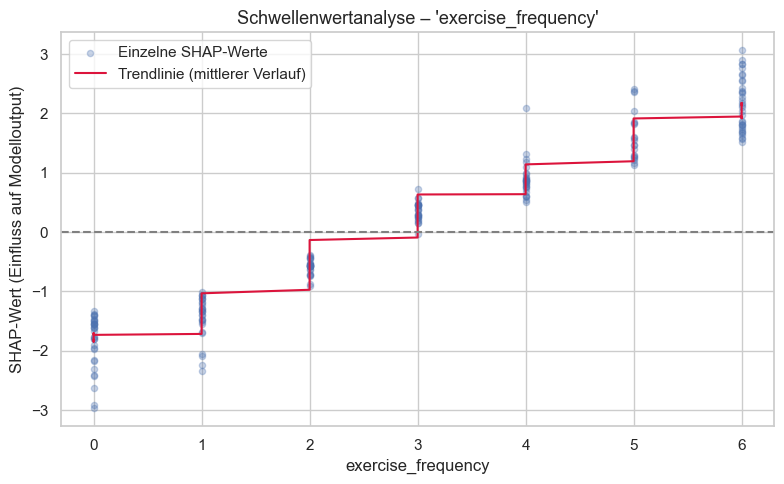

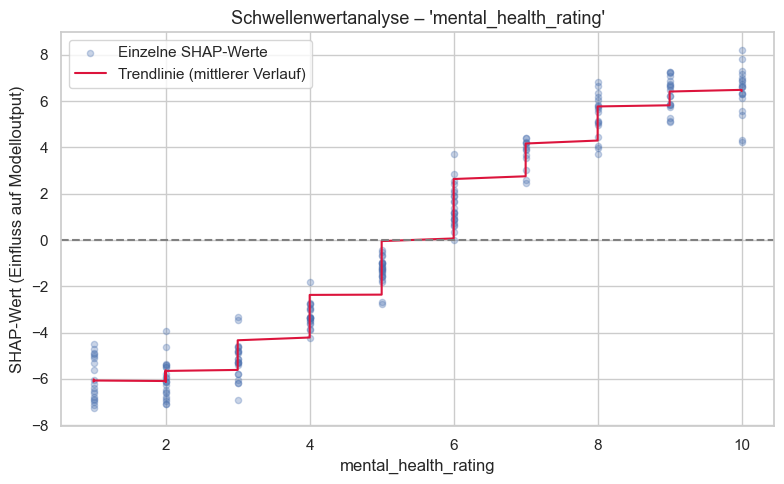

In [12]:

# Nur numerische, kontinuierliche Features visualisieren
for i, original_name in enumerate(feature_names_rf):

    # Feature-Name vereinfachen
    simplified_name = original_name.replace("remainder__", "").replace("cat__", "")

    shap_values_single = shap_values_rf[:, i]
    feature_values = X_test_transformed_rf[:, i]

    # Erkenne kontinuierliche Features
    unique_vals = np.unique(feature_values)
    is_continuous = len(unique_vals) > 6 and not np.all(np.isin(unique_vals, [0, 1]))

    if is_continuous:
        df_plot = pd.DataFrame({
            simplified_name: feature_values,
            "SHAP-Wert": shap_values_single
        }).sort_values(by=simplified_name)

        # Gleitender Mittelwert als Trendlinie
        df_plot["Trend"] = df_plot["SHAP-Wert"].rolling(window=30, center=True).mean()

        plt.figure(figsize=(8, 5))
        plt.scatter(df_plot[simplified_name], df_plot["SHAP-Wert"], alpha=0.3, s=20, label="Einzelne SHAP-Werte")
        plt.plot(df_plot[simplified_name], df_plot["Trend"], color="crimson", label="Trendlinie (mittlerer Verlauf)")
        plt.axhline(0, linestyle="--", color="gray")

        plt.title(f"Schwellenwertanalyse – '{simplified_name}'", fontsize=13)
        plt.xlabel(simplified_name)
        plt.ylabel("SHAP-Wert (Einfluss auf Modelloutput)")
        plt.legend()
        plt.tight_layout()
        plt.show()


## Schwellenwertanalyse: Einflussverlauf und Nullschnitt numerischer Merkmale

In dieser Analyse betrachten wir die Richtung und Intensität des Einflusses numerischer Features auf die Modellvorhersage mithilfe von SHAP-Werten. Besonderes Augenmerk liegt darauf, **wo genau ein Merkmal seinen Einfluss von negativ zu positiv wechselt** – also den **Nullpunkt** (SHAP = 0) überschreitet.

Die Diagramme zeigen:

- **Punkte:** einzelne SHAP-Werte (Einfluss pro Person)
- **Rote Linie:** geglätteter Mittelwertverlauf
- **Grau gestrichelte Linie:** SHAP = 0 → **kein Einfluss auf die Modellvorhersage**

---

### 🔹 `study_hours_per_day`
- **Verlauf:** Stetig zunehmender positiver Einfluss.
- **SHAP-Wert = 0 bei:** **ca. 3.0 Stunden**
- **Interpretation:** Ab 3 Lernstunden täglich wirkt sich das Feature positiv auf die vorhergesagte Leistung aus. Darunter ist der Einfluss eher negativ (zu wenig lernen = leistungsmindernd).

---

### 🔹 `mental_health_rating`
- **Verlauf:** Zunächst negativ, dann stark positiv.
- **SHAP-Wert = 0 bei:** **genau bei 6**
- **Interpretation:** Ab einer mentalen Bewertung von 6 steigt der Einfluss auf die Vorhersage. Studierende mit schlechterer mentaler Gesundheit (<6) sind tendenziell im Nachteil.

---

### 🔹 `social_media_hours`
- **Verlauf:** Abnehmend, mit deutlich negativem Trend.
- **SHAP-Wert = 0 bei:** **ca. 1.7 Stunden**
- **Interpretation:** Bis etwa 1.7 Stunden Social Media ist der Einfluss noch leicht positiv/neutral, danach negativ. Übermäßiger Konsum wirkt sich leistungsmindernd aus.

---

### 🔹 `exercise_frequency`
- **Verlauf:** Negativer Einfluss bei wenig Bewegung, positiver bei mehr Sport.
- **SHAP-Wert = 0 bei:** **ca. 3 Einheiten pro Woche**
- **Interpretation:** Unterhalb von 3 ist der Effekt eher neutral bis negativ. Ab 3 Trainingseinheiten pro Woche wirkt sich körperliche Aktivität positiv aus.

---

### 🔹 `sleep_hours`
- **Verlauf:** Stetig zunehmender positiver Effekt.
- **SHAP-Wert = 0 bei:** **ca. 6.8 Stunden**
- **Interpretation:** Unter 7 Stunden hat Schlaf eher einen negativen Einfluss. Ab etwa 6.8–7 Stunden beginnt der positive Effekt auf die Vorhersage.

---

### 🔹 `netflix_hours`
- **Verlauf:** Umgekehrte Tendenz – je mehr, desto negativer.
- **SHAP-Wert = 0 bei:** **ca. 1.0 Stunden**
- **Interpretation:** Bis ca. 1 Stunde Netflix pro Tag ist der Einfluss neutral bis leicht positiv. Danach überwiegt der negative Effekt.

---

### 🔹 `attendance_percentage`
- **Verlauf:** Deutlicher positiver Effekt bei hoher Anwesenheit.
- **SHAP-Wert = 0 bei:** **ca. 85 %**
- **Interpretation:** Unter 85 % Anwesenheit wirkt sich dieses Feature negativ auf die Vorhersage aus. Ab 85 % beginnt ein klar positiver Einfluss.

---

### 🔹 `age`
- **Verlauf:** Nahezu horizontal um 0.
- **SHAP-Wert = 0 bei:** nicht definierbar (schwankt minimal um 0)
- **Interpretation:** Das Alter hat keinen nennenswerten Effekt auf die Modellvorhersage. Kein klarer Schwellenwert vorhanden.

---

## Interpretation der Schwellenwertanalyse

Die vorgestellten Visualisierungen zeigen, wie stark einzelne Merkmale abhängig von ihrem konkreten Wert die Modellvorhersage der Prüfungsleistung beeinflussen. Durch die Betrachtung der SHAP-Werte entlang der Merkmalsausprägung lassen sich **nicht-lineare Effekte**, **kritische Kipppunkte** sowie **überraschende Trends** erkennen.

### Was war erwartbar?
- Es bestätigt sich, dass **mehr Lernzeit** und eine **bessere mentale Gesundheit** positiv zur Vorhersage beitragen. Dies entspricht allgemeinen Annahmen über erfolgreiche Lernverhaltensweisen.
- Auch die Erkenntnis, dass **hoher Medienkonsum (Netflix, Social Media)** oder **geringe Schlafdauer** tendenziell negativ wirken, ist konsistent mit bestehenden Forschungsergebnissen.
- Die **Anwesenheit in Lehrveranstaltungen** zeigt einen klaren Zusammenhang: erst ab etwa 85% beginnt ein positiver Effekt – was impliziert, dass reine Mindestanwesenheit nicht ausreicht, um sich positiv auf die Leistung auszuwirken.

### Was war überraschend?
- Bei **mental_health_rating** zeigt sich, dass erst ab einem Wert von 6 ein wirklich positiver Einfluss sichtbar wird – das deutet darauf hin, dass auch mittlere Werte im Modell noch als problematisch interpretiert werden.
- Auch bei **exercise_frequency** wird der Effekt erst ab ca. 3 Einheiten pro Woche positiv. Weniger Bewegung scheint im Modell sogar leicht negativ zu wirken – was eine genauere Auseinandersetzung mit diesem Thema nahelegt.
- **Age** hatte im Modell keinerlei Einfluss – was insofern überrascht, als dass man annehmen könnte, dass ältere oder erfahrenere Studierende eventuell strukturell andere Ergebnisse erzielen. Das Modell erkennt hier aber keine systematische Tendenz.

### Bedeutung der Nullschnittpunkte
Die Nullschnittpunkte markieren die **kritischen Schwellen**, ab denen ein Merkmal das Modellverhalten „umschaltet“ – also von einem neutralen oder negativen Einfluss zu einem positiven (oder umgekehrt). Solche Punkte bieten eine wertvolle Grundlage, um:
- **interventionsrelevante Grenzwerte** zu definieren (z.B. mindestens 3 Lernstunden pro Tag, mindestens 7 Stunden Schlaf),
- **kritische Risikozonen** zu identifizieren (z.B. >1.5h Social Media),
- und **potenzielle Zielgrößen** für individuelle Verbesserung zu formulieren.

---

**Fazit:**
Die Schwellenwertanalyse liefert konkrete Einsichten darüber, **wie** genau ein Merkmal wirkt, nicht nur ob. Dadurch entsteht ein tieferes Verständnis der Modelllogik und der Zusammenhänge zwischen studentischem Verhalten und prognostizierter Leistung. Diese Form der Modellinterpretation ist ein zentraler Bestandteil erklärbarer KI (XAI) und zeigt eindrucksvoll, wie datenbasierte Modelle nicht nur vorhersagen, sondern auch **verstehbar und nachvollziehbar gemacht werden können.**





# Schlussbetrachtung und Gesamteinordnung

## Zusammenfassung des Projektverlaufs

In dieser Arbeit wurde anhand eines synthetischen Datensatzes untersucht, wie sich studentische Verhaltensweisen auf die akademische Leistung auswirken. Dazu wurden zwei Modelle trainiert. Eine **lineare Regression** als transparentes Referenzmodell sowie ein **Random Forest** als leistungsstarkes Black-Box-Modell.

Beide Modelle wurden systematisch analysiert:
- Zunächst durch klassische Gütemaße (MSE, R²),
- anschließend mittels **SHAP-Analyse**, um erklärbare Einblicke in die Funktionsweise und Einflussgrößen der Modelle zu gewinnen.

Die erklärbaren KI-Methoden (XAI) ermöglichten dabei nicht nur die Bewertung der globalen Wichtigkeit einzelner Features, sondern auch eine **lokale, merkmalsbasierte Schwellenwertanalyse**. Damit wurde deutlich, **ab welchen Ausprägungen** ein Feature beginnt, sich systematisch positiv oder negativ auf die Vorhersage auszuwirken.

---

### Methodische Reflexion

- Die **lineare Regression** lieferte nachvollziehbare Ergebnisse, allerdings mit teils zu starren Zusammenhängen.
- Der **Random Forest** erzielte eine deutlich bessere Modellgüte, zeigte aber auch komplexere (nichtlineare) Einflussstrukturen.
- Erst durch den Einsatz von **SHAP** konnten diese Zusammenhänge transparent und individuell verständlich gemacht werden.

Besonders die Visualisierung der SHAP-Werte als:
- Barplots (globale Wichtigkeit),
- Summary Plots (Verteilung und Richtung),
- Dependence Plots (Interaktionen),
- sowie Punktverläufe mit Schwellenwertinterpretation,

ermöglichten eine tiefgehende Analyse, die weit über eine klassische Modellbewertung hinausgeht.

---

### Interpretation der wichtigsten Ergebnisse

Die SHAP-Analysen ergaben, dass:
- **Mehr Lernzeit**, **bessere mentale Gesundheit**, **ausreichender Schlaf** und **hohe Anwesenheit** konsistent positiv wirken.
- **Hoher Social Media- und Netflix-Konsum** sowie **Schlafmangel** ab bestimmten Schwellenwerten klar negativ beeinflussen.
- Der Einfluss vieler Features **nicht-linear** verläuft und häufig **erst ab einem bestimmten Punkt ins Positive umschlägt** (z.B. ab 3h Lernzeit oder ab 85% Anwesenheit).
- Einige Merkmale, etwa **Alter** im Modell **keine systematische Rolle spielen**.

Diese Erkenntnisse wurden nicht nur visualisiert, sondern auch systematisch dokumentiert, wodurch konkrete Schwellenwerte (z.B. 6.8 Stunden Schlaf, <1.5h Social Media) als Handlungsempfehlung ableitbar wurden.

---

### Limitationen

Trotz der fundierten Analyse gilt es, folgende Einschränkungen zu beachten:
- Der zugrunde liegende Datensatz ist **synthetisch generiert** und orientiert sich nur an plausiblen, aber nicht real validierten Strukturen.
- Die Modelle basieren auf den verfügbaren Merkmalen – **nicht berücksichtigte externe Faktoren** (z.B. Prüfungsangst, Vorwissen, Betreuung) könnten ebenfalls relevant sein.
- Die Interpretationen gelten ausschließlich im Rahmen des trainierten Modells – sie zeigen **modellinterne Kausalität**, aber keine echte Kausalität im wissenschaftlichen Sinne.

---

### Bedeutung und Einsatzpotenzial

Diese Arbeit demonstriert, wie **Machine Learning und XAI** gemeinsam genutzt werden können, um nicht nur leistungsfähige Vorhersagemodelle zu bauen, sondern auch konkrete, nachvollziehbare Aussagen zu generieren wie z.B.:
- Welche Lerngewohnheiten förderlich oder hinderlich sind,
- Wo realistische Zielwerte liegen (z.B. mindestens 3h Lernen/Tag),
- Und wie individuelles Verhalten mit erwarteter Leistung zusammenhängt.

Gerade im Bildungsbereich bietet die Kombination aus erklärbaren Vorhersagen und visueller Aufbereitung ein großes Potenzial für:
- **Studienberatung**
- **Selbstreflexion von Studierenden**
- **Didaktische Entscheidungen** im Hochschulkontext

---

**Abschließend zeigt dieses Projekt**, dass der Mehrwert von XAI nicht nur im Verstehen von Modellen liegt, sondern in der Möglichkeit, **konkrete, nachvollziehbare Entscheidungen aus Daten abzuleiten** – und dies auch für komplexe, nichtlineare Zusammenhänge visuell transparent zu machen.


---

## Lessons Learned – Was aus dem Projekt mitgenommen wurde

✅ **Modellgüte ist nicht alles.**
Ein leistungsfähiges Modell wie der Random Forest liefert zwar bessere Vorhersagen, doch ohne Erklärbarkeit bleiben viele Zusammenhänge verborgen. Erst durch XAI-Methoden wie SHAP wurden die inneren Entscheidungsprozesse verständlich und nachvollziehbar.

✅ **Erklärbarkeit erhöht Vertrauen.**
Die visuelle Aufbereitung der Einflussgrößen – etwa durch Barplots, Dependence-Plots und Schwellenwertanalysen – machte deutlich, wie wichtig nachvollziehbare Modelle im Bildungs- und Beratungskontext sind.

✅ **Nicht alle Effekte sind linear.**
Viele Merkmale – wie Schlafdauer, Sport oder Mediennutzung – wirken sich erst ab bestimmten Ausprägungen aus. Solche Erkenntnisse wären mit rein linearen Modellen nur schwer erfassbar gewesen.

✅ **Datenverständnis braucht Visualisierung.**
Erst durch gut gestaltete, interpretierbare Diagramme wurde deutlich, wo z.B. Kipppunkte liegen (z.B. 3h Lernen, 1.5h Social Media). Solche Darstellungen fördern sowohl die eigene Reflexion als auch die Kommunikation mit Dritten.

✅ **Erklärbare KI ist mehr als ein Tool – es ist eine Denkweise.**
Statt nur auf das „Was“ (z.B. Vorhersagewert) zu schauen, hat dieses Projekt gezeigt, wie wichtig auch das „Warum“ und „Wie“ ist. Dadurch lassen sich datenbasierte Modelle nicht nur verwenden, sondern auch verstehen, hinterfragen und sinnvoll einsetzen.


## Bonus: Interaktiver Vorhersage-Rechner

Zum Abschluss dieses Projekts wird ein kleiner interaktiver Rechner bereitgestellt. Nutzerinnen und Nutzer können selbstständig verschiedene Merkmalsausprägungen angeben (z.B. Lernzeit, Schlafdauer, mentale Gesundheit) und auf dieser Basis eine **Vorhersage der erwarteten Prüfungsleistung** erhalten.

Die Vorhersage basiert auf dem trainierten **linearen Regressionsmodell**, das in den vorherigen Kapiteln entwickelt und evaluiert wurde.

### So funktioniert die Eingabe:
- Wähle oder gib für jedes Feature den gewünschten Wert ein
- Klicke auf **„Vorhersage starten“**
- Die geschätzte Prüfungsleistung erscheint direkt darunter

Diese Anwendung zeigt beispielhaft, wie **erklärbare KI-Modelle** nicht nur analysiert, sondern auch in der Praxis verwendet werden können z.B. für Selbstreflexion, Beratung oder hypothetische Szenarien.

Es müssen alle codezeilen des Notebooks vorher ausgeführt und der Server gestartet worden sein damit der Rechner funktioniert.


In [13]:

# Stil für Titel
display(HTML("<h3 style='color:#2C3E50'> Individuelle Prognose der Prüfungsleistung</h3>"))

# Eingabefelder gruppieren
numerical_widgets = widgets.VBox([
    widgets.IntSlider(min=16, max=35, value=20, description="Alter:"),
    widgets.FloatSlider(min=0, max=10, step=0.1, value=3.0, description="Lernzeit:"),
    widgets.FloatSlider(min=0, max=12, step=0.1, value=7.0, description="Schlaf:"),
    widgets.FloatSlider(min=0, max=10, step=0.1, value=2.0, description="Social Media:"),
    widgets.FloatSlider(min=0, max=10, step=0.1, value=1.0, description="Netflix:"),
    widgets.IntSlider(min=0, max=100, value=90, description="Anwesenheit:"),
    widgets.IntSlider(min=0, max=10, value=3, description="Sport/Woche:"),
    widgets.IntSlider(min=1, max=10, value=6, description="Mental:"),
])

categorical_widgets = widgets.VBox([
    widgets.Dropdown(options=["Male", "Female", "Other"], description="Geschlecht:"),
    widgets.Dropdown(options=["Yes", "No"], description="Nebenjob:"),
    widgets.Dropdown(options=["Poor", "Average", "Good"], description="Ernährung:"),
    widgets.Dropdown(options=["High School", "Bachelor", "Master", "nan"], description="Eltern:"),
    widgets.Dropdown(options=["Poor", "Average", "Good"], description="Internet:"),
    widgets.Dropdown(options=["Yes", "No"], description="Aktivitäten:")
])

# Layout
input_ui = widgets.HBox([numerical_widgets, categorical_widgets])

# Button und Ausgabe
button = widgets.Button(description="Vorhersage starten", button_style="success")
output = widgets.Output()
display(input_ui, button, output)

# Vorhersagefunktion mit Begrenzung auf 0–100 Punkte
def make_prediction(b):
    keys = [
        "age", "study_hours_per_day", "sleep_hours", "social_media_hours", "netflix_hours",
        "attendance_percentage", "exercise_frequency", "mental_health_rating",
        "gender", "part_time_job", "diet_quality", "parental_education_level",
        "internet_quality", "extracurricular_participation"
    ]

    widgets_flat = numerical_widgets.children + categorical_widgets.children
    user_input = {k: w.value for k, w in zip(keys, widgets_flat)}
    df_input = pd.DataFrame([user_input])

    raw_prediction = model_pipeline_lr.predict(df_input)[0]
    prediction = max(0, min(100, raw_prediction))  # Begrenzung auf 0–100

    with output:
        clear_output()
        print(f" Erwartete Prüfungsleistung: {prediction:.2f} Punkte")



# Ereignisbindung
button.on_click(make_prediction)


Button(button_style='success', description='Vorhersage starten', style=ButtonStyle())

Output()